In [90]:
#ifile = "embedded_sample/muonGun_SIMPU_FULL.root"
ifile = "embedded_sample/BKG_FULL.root"

In [3]:
import ROOT

Welcome to JupyROOT 6.24/00


In [4]:
from scipy import stats

In [5]:
# import libraries
import uproot3 as uproot
import uproot as uproot4
import numpy as np
#import numba
import awkward as ak

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import                                                                                                                  
import mplhep as hep
plt.style.use(hep.style.ROOT)
import os,sys
import pandas as pd
from scipy.stats import halfnorm

In [7]:
from sklearn.cluster import KMeans
import random
from scipy.stats import binned_statistic
from scipy.optimize import curve_fit
from scipy.stats import crystalball
from lmfit import Model
import copy
#from coffea import hist

In [7]:
# Process Data
def getData(fname="", procName="Events"):
    kn_dict = uproot.open(fname)["Events"].arrays()
    kn_dict_ak1 = {name.decode(): ak.from_awkward0(array) for name, array in kn_dict.items()}
    kn_events = ak.zip({"Tracks":ak.zip({
                                      "n_truthtracks":   kn_dict_ak1["n_truthtracks"],
                                        "truthtrack_x_st3":   kn_dict_ak1["truthtrack_x_st3"],
                                        "truthtrack_y_st3":   kn_dict_ak1["truthtrack_y_st3"],
                                        "truthtrack_z_st3":   kn_dict_ak1["truthtrack_z_st3"],
                                        "truthtrack_x_st1":   kn_dict_ak1["truthtrack_x_st1"],
                                        "truthtrack_y_st1":   kn_dict_ak1["truthtrack_y_st1"],
                                        "truthtrack_z_st1":   kn_dict_ak1["truthtrack_z_st1"],
                                        "truthtrack_pz_st1":   kn_dict_ak1["truthtrack_pz_st1"],
                                        "truthtrack_pz_st3":   kn_dict_ak1["truthtrack_pz_st3"],
                                        "truthtrack_px_st3":   kn_dict_ak1["truthtrack_px_st3"],
                                        "truthtrack_py_st3":   kn_dict_ak1["truthtrack_py_st3"],
                                        "truthtrack_x_vtx":   kn_dict_ak1["truthtrack_x_vtx"],
                                        "truthtrack_y_vtx":   kn_dict_ak1["truthtrack_y_vtx"],
                                        "truthtrack_z_vtx":   kn_dict_ak1["truthtrack_z_vtx"],
                                      }),
                        "RecoTracks":ak.zip({
                                      "n_tracks":   kn_dict_ak1["n_tracks"],
                                        "track_pz_st1":   kn_dict_ak1["track_pz_st1"],
                                        "track_x_st1":   kn_dict_ak1["track_x_st1"],
                                        "track_y_st1":   kn_dict_ak1["track_y_st1"],
                                        "track_x_st3":   kn_dict_ak1["track_x_st3"],
                                        "track_y_st3":   kn_dict_ak1["track_y_st3"],
                                        "track_px_st3":   kn_dict_ak1["track_px_st3"],
                                        "track_py_st3":   kn_dict_ak1["track_py_st3"],
                                        "track_pz_st3":   kn_dict_ak1["track_pz_st3"],
                                        "track_x_CAL":   kn_dict_ak1["track_x_CAL"],
                                        "track_y_CAL":   kn_dict_ak1["track_y_CAL"],
                                        "track_chisq":   kn_dict_ak1["track_chisq"],
                                      }),
                        "Electrons":ak.zip({
                                            "ge":      kn_dict_ak1["ge"],
                                            "gvx":      kn_dict_ak1["gvx"],
                                            "gvy":      kn_dict_ak1["gvy"],
                                            "gvz":      kn_dict_ak1["gvz"],
                                            "gpx":      kn_dict_ak1["gpx"],
                                            "gpy":      kn_dict_ak1["gpy"],
                                            "gpz":      kn_dict_ak1["gpz"],
                                        }),
                        "Hits":ak.zip({
                                            "n_hits":    kn_dict_ak1["n_hits"],
                                            "n_hits_d0":    kn_dict_ak1["n_hits_d0"],
                                            "n_hits_d1":    kn_dict_ak1["n_hits_d1"],
                                            "n_hits_d2":    kn_dict_ak1["n_hits_d2"],
                                            "n_hits_d3p":    kn_dict_ak1["n_hits_d3p"],
                                            "n_hits_d3m":    kn_dict_ak1["n_hits_d3m"],
                                            "n_hits_h2x":    kn_dict_ak1["n_hits_h2x"],
                                            "n_hits_h3x":    kn_dict_ak1["n_hits_h3x"],
                                    }),
                        "HitsInfo":ak.zip({
                                            "hit_detID":    kn_dict_ak1["hit_detID"],
                                            "hit_edep":    kn_dict_ak1["hit_edep"],
                                            "hit_elmID":   kn_dict_ak1["hit_elmID"],
                                            "hit_truthx":  kn_dict_ak1["hit_truthx"],
                                            "hit_truthy":  kn_dict_ak1["hit_truthy"],
                                            "hit_truthz":  kn_dict_ak1["hit_truthz"],
                                    }),
                       }, depth_limit=1)
    return kn_events

In [91]:
kn_events = getData(ifile,"Events")

In [17]:
#print(kn_events[3]["Tracks"].n_truthtracks[-1])
#print(kn_events[3]["RecoTracks"].n_tracks)
#print(kn_events[0:3]["Hits"].n_hits)
#print(kn_events[0]["HitsInfo"].hit_detID)

In [11]:
#testarr = [2,3,4,5,6,1,6,7,2,1]
#print(len(testarr))
#for i in range(0,len(testarr)):
#    print(testarr[i], i)
#blah = 2
#blah+=1
#print(blah)

In [31]:
"""
pxsP = []
pysP = []
pzsP = []
truthtrackXP = []
truthtrackXst1P = []
ntracksP = []
px_for_CAL = []
TTX_for_CAL = []
x_for_CAL = []

nFakes = []
nBkg = []
bFakes = []
bBkg = []
nHits = []

nhitsD0 = []
nhitsD1 = []
nhitsD2 = []
nhitsD3p = []
nhitsD3m = []

nhitsDCH = []

fakeXs = []
fakeYs = []
fakePXs = []
fakePYs = []
fakePZs = []
fakeChiSqs = []
realChiSqs = []

totalEBKG = []

for i in range(0,2000):
    
    totalE = 0.
    
    for h in range(0, kn_events[i]["Hits"].n_hits):
        if(kn_events[i]["HitsInfo"].hit_detID[h] == 100):
            totalE+=kn_events[i]["HitsInfo"].hit_edep[h]

    totalEBKG.append(totalE)
"""
"""   
    nHits.append(kn_events[i]["Hits"].n_hits)
    nhitsD0.append(kn_events[i]["Hits"].n_hits_d0)
    nhitsD1.append(kn_events[i]["Hits"].n_hits_d1)
    nhitsD2.append(kn_events[i]["Hits"].n_hits_d2)
    nhitsD3p.append(kn_events[i]["Hits"].n_hits_d3p)
    nhitsD3m.append(kn_events[i]["Hits"].n_hits_d3m)
    
    nhitsDCH.append(kn_events[i]["Hits"].n_hits_d0+kn_events[i]["Hits"].n_hits_d2+kn_events[i]["Hits"].n_hits_d3p+kn_events[i]["Hits"].n_hits_d3m+kn_events[i]["Hits"].n_hits_h2x+kn_events[i]["Hits"].n_hits_h3x)
    
    #pxsP.append(kn_events[i]["Tracks"].truthtrack_px_st3[-1])
    #pysP.append(kn_events[i]["Tracks"].truthtrack_py_st3[-1])
    #pzsP.append(kn_events[i]["Tracks"].truthtrack_pz_st3[-1])
    pxsP.append(kn_events[i]["Electrons"].gpx[-1])
    pysP.append(kn_events[i]["Electrons"].gpy[-1])
    pzsP.append(kn_events[i]["Electrons"].gpz[-1])
    
    truthtrackXP.append(kn_events[i]["Tracks"].truthtrack_x_st3[-1])
    
    numFake = 0
    numPrime = 0
    numBkg = 0
    
    if(len(kn_events[i]["RecoTracks"].n_tracks)>0):
        for d in range(0, kn_events[i]["RecoTracks"].n_tracks[0]):
            matched = False
            bkg = False
            prime = False
            for tp in range(0, kn_events[i]["Tracks"].n_truthtracks[0]):
                if(abs(kn_events[i]["Tracks"].truthtrack_x_st3[tp])<.0001 or abs(kn_events[i]["Tracks"].truthtrack_y_st3[tp])<.0001):
                    continue
                if( abs(kn_events[i]["RecoTracks"].track_x_st1[d] - kn_events[i]["Tracks"].truthtrack_x_st1[tp]) < 3. and abs(kn_events[i]["RecoTracks"].track_y_st1[d] - kn_events[i]["Tracks"].truthtrack_y_st1[tp]) < 4. and abs(kn_events[i]["RecoTracks"].track_x_st3[d] - kn_events[i]["Tracks"].truthtrack_x_st3[tp]) < 3. and abs(kn_events[i]["RecoTracks"].track_y_st3[d] - kn_events[i]["Tracks"].truthtrack_y_st3[tp]) < 4. ):
                    if(tp < (len(kn_events[i]["Tracks"].n_truthtracks)-1)):
                        bkg = True
                        matched = True
                    if(tp == (len(kn_events[i]["Tracks"].n_truthtracks)-1)):
                        prime = True
                        matched = True
            if(prime):
                numPrime+=1
                realChiSqs.append(kn_events[i]["RecoTracks"].track_chisq[d])
            elif(bkg):
                numBkg+=1
                realChiSqs.append(kn_events[i]["RecoTracks"].track_chisq[d])
            if(not matched):
                numFake += 1
                fakeXs.append(kn_events[i]["RecoTracks"].track_x_st3[d])
                fakeYs.append(kn_events[i]["RecoTracks"].track_y_st3[d])
                fakePXs.append(kn_events[i]["RecoTracks"].track_px_st3[d])
                fakePYs.append(kn_events[i]["RecoTracks"].track_py_st3[d])
                fakePZs.append(kn_events[i]["RecoTracks"].track_pz_st3[d])
                fakeChiSqs.append(kn_events[i]["RecoTracks"].track_chisq[d])
                #print(i)
    
    if(numPrime>0):
        ntracksP.append(1)
    else:
        ntracksP.append(0)
    if(numBkg>0):
        nBkg.append(numBkg)
        bBkg.append(1)
    else:
        nBkg.append(numBkg)
        bBkg.append(0)
    if(numFake>0):
        nFakes.append(numFake)
        bFakes.append(1)
    else:
        nFakes.append(numFake)
        bFakes.append(0)
""" 
"""
    if(len(kn_events[i]["RecoTracks"].n_tracks)>0):
        for d in range(0, kn_events[i]["RecoTracks"].n_tracks[0]):
            if( abs(kn_events[i]["RecoTracks"].track_x_st3[d] - kn_events[i]["Tracks"].truthtrack_x_st3[-1]) < 3. or abs(kn_events[i]["RecoTracks"].track_y_st3[d] - kn_events[i]["Tracks"].truthtrack_y_st3[-1]) < 4. ):
                numPrime = 1
        ntracksP.append(numPrime)
    else:
        ntracksP.append(0)
    nFakes.append(numFake)
"""
"""
    pxs.append(kn_events[i]["Electrons"].gpx[0])
    pys.append(kn_events[i]["Electrons"].gpy[0])
    pzs.append(kn_events[i]["Electrons"].gpz[0])
    if(kn_events[i]["RecoTracks"].n_tracks[0] > 0):
        ntracks.append(1)
    else:
        ntracks.append(0)
    truthtrackX.append(kn_events[i]["Tracks"].truthtrack_x_st3[0])
    truthtrackXst1.append(kn_events[i]["Tracks"].truthtrack_x_st1[0])
    if(kn_events[i]["Tracks"].n_tracks[0] == 1):
        px_for_CAL.append(kn_events[i]["Electrons"].gpx[0])
        TTX_for_CAL.append(kn_events[i]["Tracks"].truthtrack_x_st3[0])
        x_for_CAL.append(kn_events[i]["RecoTracks"].track_x_CAL[0])
"""

'\n    pxs.append(kn_events[i]["Electrons"].gpx[0])\n    pys.append(kn_events[i]["Electrons"].gpy[0])\n    pzs.append(kn_events[i]["Electrons"].gpz[0])\n    if(kn_events[i]["RecoTracks"].n_tracks[0] > 0):\n        ntracks.append(1)\n    else:\n        ntracks.append(0)\n    truthtrackX.append(kn_events[i]["Tracks"].truthtrack_x_st3[0])\n    truthtrackXst1.append(kn_events[i]["Tracks"].truthtrack_x_st1[0])\n    if(kn_events[i]["Tracks"].n_tracks[0] == 1):\n        px_for_CAL.append(kn_events[i]["Electrons"].gpx[0])\n        TTX_for_CAL.append(kn_events[i]["Tracks"].truthtrack_x_st3[0])\n        x_for_CAL.append(kn_events[i]["RecoTracks"].track_x_CAL[0])\n'

In [32]:
"""
pxsP = []
pysP = []
pzsP = []
for i in range(0,32000):
    
    pxsP.append(kn_events[i]["Electrons"].gpx[-1])
    pysP.append(kn_events[i]["Electrons"].gpy[-1])
    pzsP.append(kn_events[i]["Electrons"].gpz[-1])
"""

'\npxsP = []\npysP = []\npzsP = []\nfor i in range(0,32000):\n    \n    pxsP.append(kn_events[i]["Electrons"].gpx[-1])\n    pysP.append(kn_events[i]["Electrons"].gpy[-1])\n    pzsP.append(kn_events[i]["Electrons"].gpz[-1])\n'

In [33]:
#plt.hist(totalEBKG)

In [34]:
def emcal_selection(arr):
    mask = (arr.hit_detID == 100)
    return mask

In [92]:
totalEBKG = []

for i in range(0,32000):
    
    totalE = 0.
    kn_hits = kn_events[i]["HitsInfo"]    
    emcal_mask = emcal_selection(kn_hits)
    emcal_hits = kn_hits[emcal_mask]
    totalEBKG.append(np.sum(emcal_hits.hit_edep))

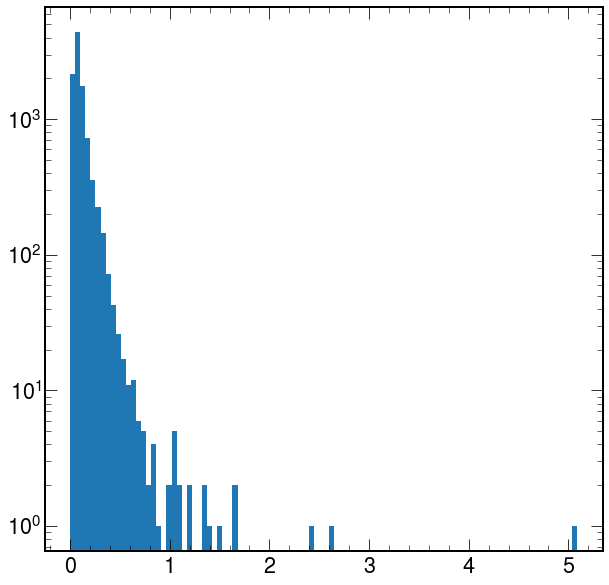

In [42]:
plt.hist(totalEBKG, bins=100)
plt.yscale("log")

In [50]:
ifileSIG27 = "embedded_sample/Brem_2.302710_z500_600_eps_-7.root"
ifileSIG25 = "embedded_sample/Brem_2.302710_z500_600_eps_-5.root"
ifileSIG07 = "embedded_sample/Brem_0.613515_z500_600_eps_-7.root"
ifileSIG05 = "embedded_sample/Brem_0.613515_z500_600_eps_-5.root"

In [51]:
kn_eventsSIG27 = getData(ifileSIG27,"Events")
kn_eventsSIG25 = getData(ifileSIG25,"Events")
kn_eventsSIG07 = getData(ifileSIG07,"Events")
kn_eventsSIG05 = getData(ifileSIG05,"Events")

In [52]:
totalESIG27 = []
totalESIG25 = []
totalESIG07 = []
totalESIG05 = []

for i in range(0,10000):
    
    totalE = 0.
    kn_hits27 = kn_eventsSIG27[i]["HitsInfo"]
    kn_hits25 = kn_eventsSIG25[i]["HitsInfo"]
    kn_hits07 = kn_eventsSIG07[i]["HitsInfo"]
    kn_hits05 = kn_eventsSIG05[i]["HitsInfo"]
    emcal_mask27 = emcal_selection(kn_hits27)
    emcal_hits27 = kn_hits27[emcal_mask27]
    totalESIG27.append(np.sum(emcal_hits27.hit_edep))
    emcal_mask25 = emcal_selection(kn_hits25)
    emcal_hits25 = kn_hits25[emcal_mask25]
    totalESIG25.append(np.sum(emcal_hits25.hit_edep))
    emcal_mask07 = emcal_selection(kn_hits07)
    emcal_hits07 = kn_hits07[emcal_mask07]
    totalESIG07.append(np.sum(emcal_hits07.hit_edep))
    emcal_mask05 = emcal_selection(kn_hits05)
    emcal_hits05 = kn_hits05[emcal_mask05]
    totalESIG05.append(np.sum(emcal_hits05.hit_edep))

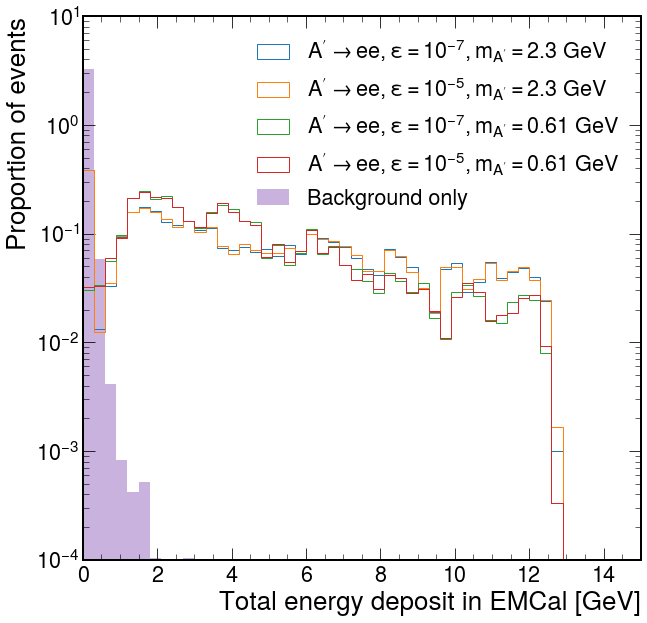

In [98]:
plt.hist(totalESIG27, bins=np.linspace(0, 15, 51), density=True, histtype='step', label=r"$A' \rightarrow ee, \epsilon = 10^{-7}, m_{A'} = 2.3$ GeV")
plt.hist(totalESIG25, bins=np.linspace(0, 15, 51), density=True, histtype='step', label=r"$A' \rightarrow ee, \epsilon = 10^{-5}, m_{A'} = 2.3$ GeV")
plt.hist(totalESIG07, bins=np.linspace(0, 15, 51), density=True, histtype='step', label=r"$A' \rightarrow ee, \epsilon = 10^{-7}, m_{A'} = 0.61$ GeV")
plt.hist(totalESIG05, bins=np.linspace(0, 15, 51), density=True, histtype='step', label=r"$A' \rightarrow ee, \epsilon = 10^{-5}, m_{A'} = 0.61$ GeV")
plt.hist(totalEBKG, bins=np.linspace(0, 15, 51), density=True, alpha=0.5, label="Background only")
plt.xlim([0,15])
plt.ylim([0.0001,10])
plt.yscale("log")
plt.legend(loc='upper right')
plt.xlabel('Total energy deposit in EMCal [GeV]')
plt.ylabel('Proportion of events')
plt.savefig('plotsForWhitePaper/EMCalTotalE.pdf')

In [97]:
passingTEB = 0
for teb in totalEBKG:
    if(teb > 2.):
        passingTEB += 1
print(passingTEB)
print(len(totalEBKG))

2
32000


In [95]:
passingTES = 0
for tes in totalESIG27:
    if(tes > 2.):
        passingTES += 1
print(passingTES)
print(len(totalESIG27))

7121
10000


In [20]:
def masscalc(x1, y1, z1, x2, y2, z2, m):
    p1 = x1**2 + y1**2 + z1**2
    p1 = np.sqrt(p1)
    p2 = x2**2 + y2**2 + z2**2
    p2 = np.sqrt(p2)
    e1 = m**2 + p1**2
    e1 = np.sqrt(e1)
    print(e1)
    e2 = m**2 + p2**2
    e2 = np.sqrt(e2)
    print(e2)
    e = e1+e2
    x = x1+x2
    y = y1+y2
    z = z1+z2
    mass = e**2 - x**2 - y**2 -z**2
    mass = np.sqrt(mass)
    print(mass)
    return mass

In [22]:
masscalc(0.0208979, -0.275733, 60.948654, 0.0042224, -0.054976,  25.92869, .105658)

60.94937287154145
25.928963899822563
0.2500003841066023


0.2500003841066023

In [24]:
masscalc(-0.014513, 0.1054475, 14.076276, -0.268312, -0.108508, 34.882228, .105658)

14.077074960501035
34.88358867966935
0.36258905196021496


0.36258905196021496

In [25]:
masscalc(0.0348848, -0.065888,  25.86343, 0.0186105, -0.282077, 60.497409, .105658)

25.86375326892211
60.498161733319506
0.24881455371015257


0.24881455371015257

In [29]:
masscalc(-0.258940, -0.105434, 34.131835, -0.019964, 0.1128454, 14.250366, .0005)

34.132980048176
14.250826784069517
0.27847370716281844


0.27847370716281844

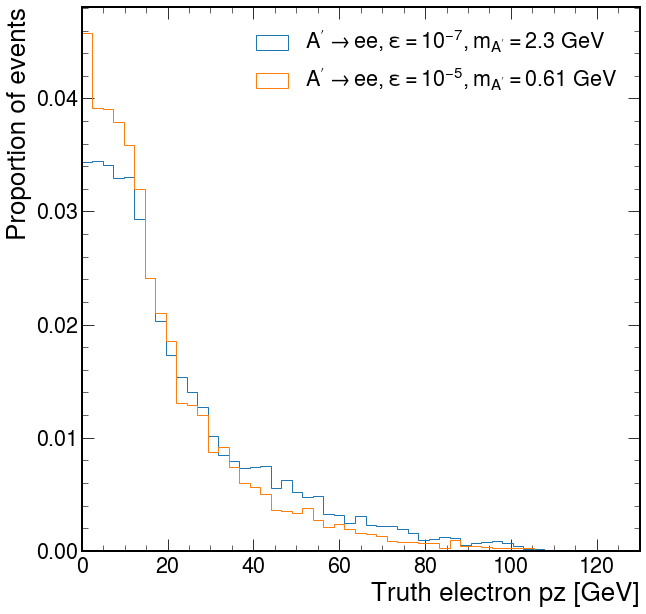

In [119]:
plt.hist(kn_eventsSIG27["Electrons"].gpz[:,0], bins=np.linspace(0, 120, 50), density=True, histtype='step', label=r"$A' \rightarrow ee, \epsilon = 10^{-7}, m_{A'} = 2.3$ GeV")
#plt.hist(kn_eventsSIG25["Electrons"].gpz, bins=np.linspace(0, 120, 50), density=True, histtype='step', label=r"$A' \rightarrow ee, \epsilon = 10^{-5}, m_{A'} = 2.3$ GeV")
#plt.hist(kn_eventsSIG07["Electrons"].gpz, bins=np.linspace(0, 120, 50), density=True, histtype='step', label=r"$A' \rightarrow ee, \epsilon = 10^{-7}, m_{A'} = 0.61$ GeV")
plt.hist(kn_eventsSIG05["Electrons"].gpz[:,0], bins=np.linspace(0, 120, 50), density=True, histtype='step', label=r"$A' \rightarrow ee, \epsilon = 10^{-5}, m_{A'} = 0.61$ GeV")

plt.xlim([0,130])

plt.legend(loc='upper right')
plt.xlabel('Truth electron pz [GeV]')
plt.ylabel('Proportion of events')
plt.savefig('plotsForWhitePaper/AprimeEEPZ.pdf')


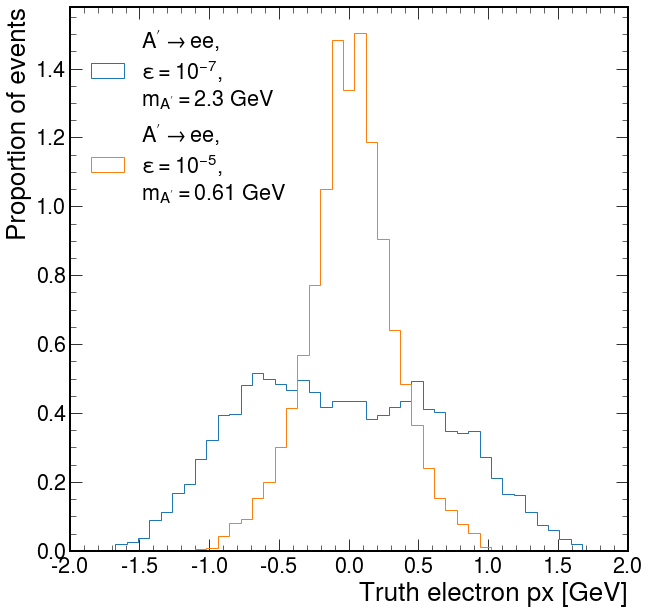

In [132]:
plt.hist(kn_eventsSIG27["Electrons"].gpx[:,0], bins=np.linspace(-2, 2, 50), density=True, histtype='step', label=r"$A' \rightarrow ee$,"+"\n$\epsilon = 10^{-7}$,"+"\n$m_{A'} = 2.3$ GeV")
#plt.hist(kn_eventsSIG25["Electrons"].gpz, bins=np.linspace(0, 120, 50), density=True, histtype='step', label=r"$A' \rightarrow ee, \epsilon = 10^{-5}, m_{A'} = 2.3$ GeV")
#plt.hist(kn_eventsSIG07["Electrons"].gpz, bins=np.linspace(0, 120, 50), density=True, histtype='step', label=r"$A' \rightarrow ee, \epsilon = 10^{-7}, m_{A'} = 0.61$ GeV")
plt.hist(kn_eventsSIG05["Electrons"].gpx[:,0], bins=np.linspace(-2, 2, 50), density=True, histtype='step', label=r"$A' \rightarrow ee$,"+"\n$\epsilon = 10^{-5}$,"+"\n$m_{A'} = 0.61$ GeV")

plt.xlim([-2,2])

plt.legend(loc='upper left')
plt.xlabel('Truth electron px [GeV]')
plt.ylabel('Proportion of events')
plt.savefig('plotsForWhitePaper/AprimeEEPX.pdf')

In [170]:
print(len(kn_events[2]["Electrons"].gpz))
print(kn_events[2]["Electrons"].gpz)
print(kn_events[2]["Tracks"].truthtrack_pz_st1)

99
[6.49, 4.68, 6.55, 12, 5.78, 6.78, 12.2, ... 7.64, 14.2, 4.67, 5.63, 13.8, 12.1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7.07, 0]


In [183]:
allBKGpzs = []
allBKGxs1 = []
allBKGxs3 = []
for i in range(0,10000):
    for d in range(len(kn_events[i]["Tracks"].truthtrack_pz_st1)):
        if(abs(kn_events[i]["Tracks"].truthtrack_pz_st1[d]) > 0.000001):
            #allBKGpzs.append(kn_events[i]["Electrons"].gpz[d])
            allBKGpzs.append(kn_events[i]["Tracks"].truthtrack_pz_st1[d])
            allBKGxs1.append(kn_events[i]["Tracks"].truthtrack_x_st1[d])
            if(abs(kn_events[i]["Tracks"].truthtrack_x_st3[d]) > .000001):
                allBKGxs3.append(kn_events[i]["Tracks"].truthtrack_x_st3[d])

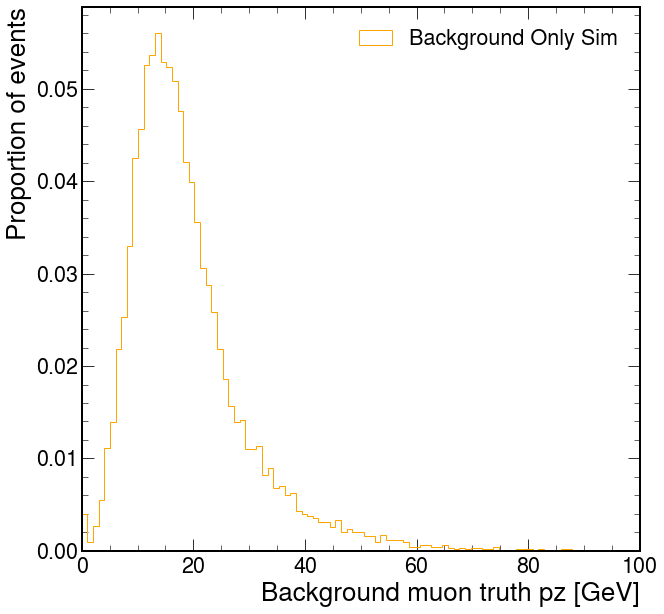

In [173]:
plt.hist(allBKGpzs, bins=np.linspace(0, 100, 100), density=True, histtype='step', color='orange', label='Background Only Sim')

plt.xlim([0,100])
#plt.yscale("log")

plt.legend(loc='upper right')
plt.xlabel('Background muon truth pz [GeV]')
plt.ylabel('Proportion of events')
plt.savefig('plotsForWhitePaper/BKGPZ.pdf')

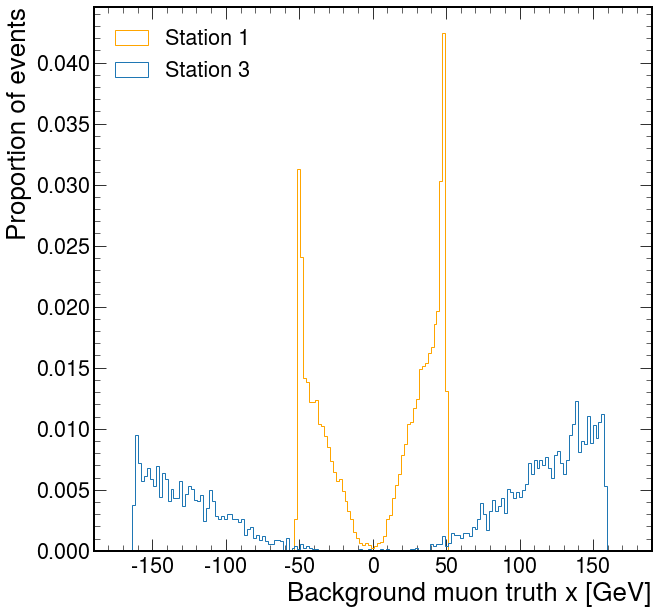

In [193]:
plt.hist(allBKGxs1, bins=np.linspace(-100, 100, 100), density=True, histtype='step', color='orange', label='Station 1')
plt.hist(allBKGxs3, bins=np.linspace(-200, 200, 200), density=True, histtype='step', label='Station 3')

plt.xlim([-190,190])
#plt.xlim([0,.05])
#plt.yscale("log")

plt.legend(loc='upper left')
plt.xlabel('Background muon truth x [GeV]')
plt.ylabel('Proportion of events')
plt.savefig('plotsForWhitePaper/BKGX.pdf')

In [190]:
print(len(allBKGxs3))
print(len(allBKGxs1))

3817
18675


In [191]:
highx = 0
for b3 in allBKGxs3:
    if(abs(b3)>115):
        highx+=1
print(highx)

2463


In [116]:
print(np.sum(nFakes))
print(np.sum(nBkg))

289
2699


Text(0, 1, 'Proportion of events')

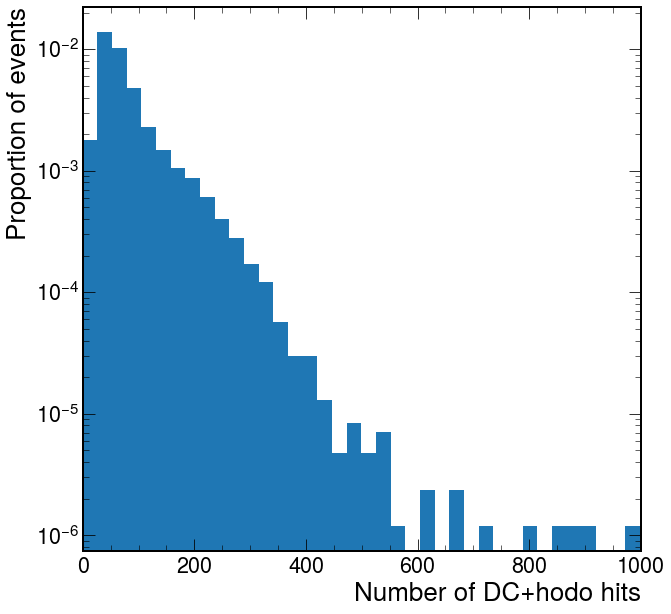

In [150]:
plt.hist(nHits, bins=50, density=True)
#plt.hist(nhitsDCH, density=True, bins=np.logspace(np.log10(10),np.log10(3000.0), 21))
#plt.hist(nhitsDCH, density=True, bins=np.logspace(np.log10(10),np.log10(1500.0), 21))
#plt.xscale("log")
plt.yscale("log")
plt.xlim([0, 1000])
plt.xlabel('Number of DC+hodo hits')
plt.ylabel('Proportion of events')

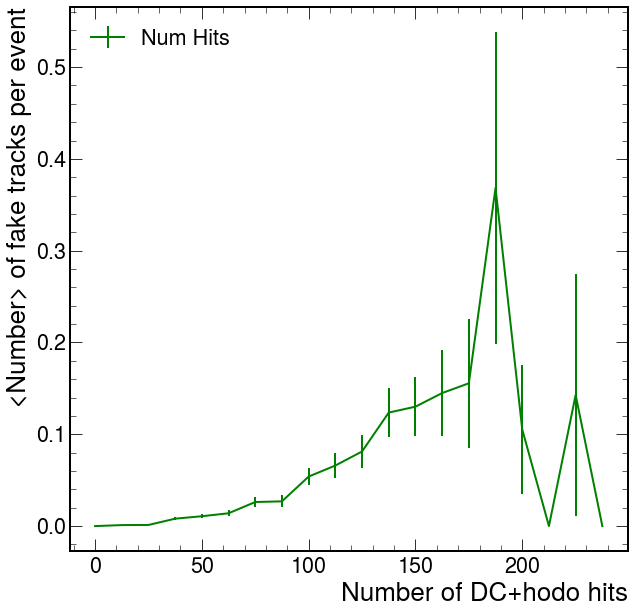

In [167]:
#bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsDCH), np.array(nFakes), statistic='mean',bins=np.logspace(np.log10(10),np.log10(3000.0), 21))
#bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsDCH), np.array(nFakes), statistic='std',bins=np.logspace(np.log10(10),np.log10(3000.0), 21))
#bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(nHits), np.array(nFakes), statistic='mean',bins=20)
#bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(nHits), np.array(nFakes), statistic='std',bins=20)
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsDCH), np.array(nFakes), statistic='mean',bins=np.linspace(0, 250, 21))
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsDCH), np.array(nFakes), statistic='std',bins=np.linspace(0, 250, 21))


counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]

plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='Num Hits')

plt.xlabel('Number of DC+hodo hits')
plt.ylabel('<Number> of fake tracks per event')

#plt.xscale("log")
#plt.xlim([0, 1000])

plt.legend(loc='upper left')

In [164]:
for i in range(0, len(nhitsDCH)):
    if(nhitsDCH[i] < 350 and nhitsDCH[i] > 300):
        print(nhitsDCH[i])
        print(nFakes[i])

In [158]:
#print(np.linspace(0,1000,20))

[   0.           52.63157895  105.26315789  157.89473684  210.52631579
  263.15789474  315.78947368  368.42105263  421.05263158  473.68421053
  526.31578947  578.94736842  631.57894737  684.21052632  736.84210526
  789.47368421  842.10526316  894.73684211  947.36842105 1000.        ]


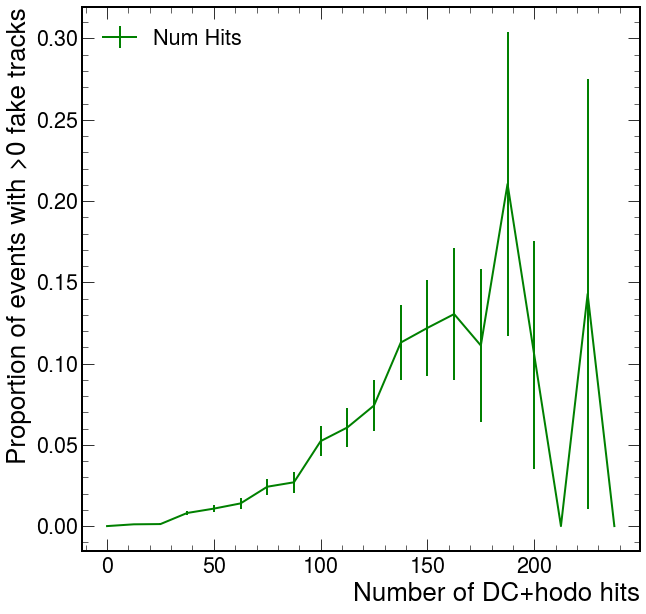

In [169]:
#bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsDCH), np.array(bFakes), statistic='mean',bins=np.logspace(np.log10(10),np.log10(3000.0), 21))
#bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsDCH), np.array(bFakes), statistic='std',bins=np.logspace(np.log10(10),np.log10(3000.0), 21))
#bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(nHits), np.array(nFakes), statistic='mean',bins=10)
#bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(nHits), np.array(nFakes), statistic='std',bins=10)
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsDCH), np.array(bFakes), statistic='mean',bins=np.linspace(0, 250, 21))
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsDCH), np.array(bFakes), statistic='std',bins=np.linspace(0, 250, 21))

counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]

plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='Num Hits')

plt.xlabel('Number of DC+hodo hits')
plt.ylabel('Proportion of events with >0 fake tracks')

#plt.xscale("log")

plt.legend(loc='upper left')

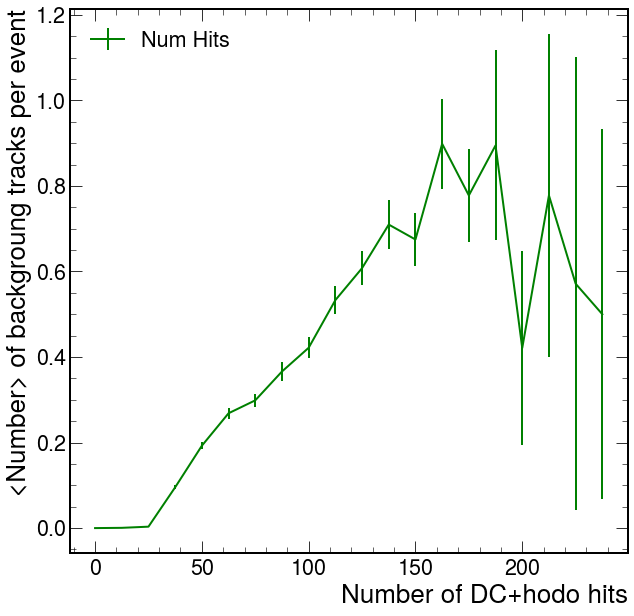

In [170]:
#bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsDCH), np.array(nBkg), statistic='mean',bins=np.logspace(np.log10(10),np.log10(3000.0), 21))
#bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsDCH), np.array(nBkg), statistic='std',bins=np.logspace(np.log10(10),np.log10(3000.0), 21))
#bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(nHits), np.array(nFakes), statistic='mean',bins=10)
#bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(nHits), np.array(nFakes), statistic='std',bins=10)
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsDCH), np.array(nBkg), statistic='mean',bins=np.linspace(0, 250, 21))
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsDCH), np.array(nBkg), statistic='std',bins=np.linspace(0, 250, 21))


counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]

plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='Num Hits')

plt.xlabel('Number of DC+hodo hits')
plt.ylabel('<Number> of backgroung tracks per event')

#plt.xscale("log")

plt.legend(loc='upper left')

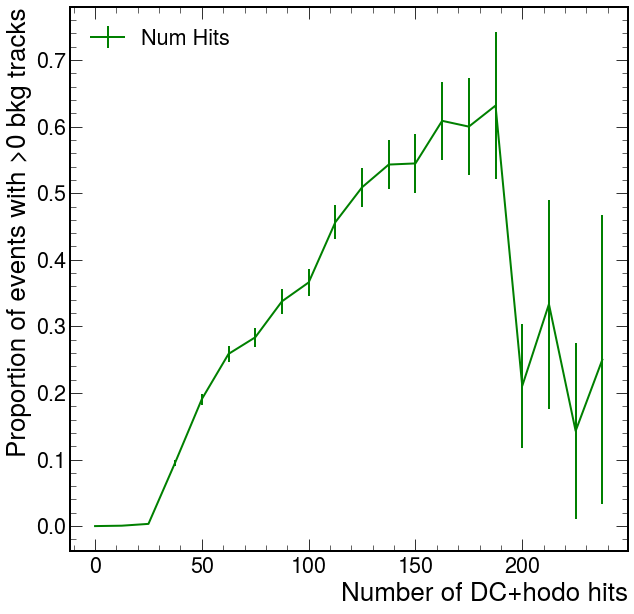

In [171]:
#bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsDCH), np.array(bBkg), statistic='mean',bins=np.logspace(np.log10(10),np.log10(3000.0), 21))
#bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsDCH), np.array(bBkg), statistic='std',bins=np.logspace(np.log10(10),np.log10(3000.0), 21))
#bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(nHits), np.array(nFakes), statistic='mean',bins=10)
#bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(nHits), np.array(nFakes), statistic='std',bins=10)
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsDCH), np.array(bBkg), statistic='mean',bins=np.linspace(0, 250, 21))
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsDCH), np.array(bBkg), statistic='std',bins=np.linspace(0, 250, 21))


counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]

plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='Num Hits')

plt.xlabel('Number of DC+hodo hits')
plt.ylabel('Proportion of events with >0 bkg tracks')

#plt.xscale("log")

plt.legend(loc='upper left')

<ipython-input-172-8df710d3e523>:18: RuntimeWarning: invalid value encountered in true_divide
  plt.errorbar(bin_edges[:5], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='Num D0 hits')
<ipython-input-172-8df710d3e523>:19: RuntimeWarning: invalid value encountered in true_divide
  plt.errorbar(bin_edgesD2[:5], bin_meansD2, bin_stdsD2/np.sqrt(countsD2), color='b', lw=2, label='Num D2 hits')
<ipython-input-172-8df710d3e523>:20: RuntimeWarning: invalid value encountered in true_divide
  plt.errorbar(bin_edgesD3p[:5], bin_meansD3p, bin_stdsD3p/np.sqrt(countsD3p), color='y', lw=2, label='Num D3p hits')
<ipython-input-172-8df710d3e523>:21: RuntimeWarning: invalid value encountered in true_divide
  plt.errorbar(bin_edgesD3m[:5], bin_meansD3m, bin_stdsD3m/np.sqrt(countsD3m), color='m', lw=2, label='Num D3m hits')


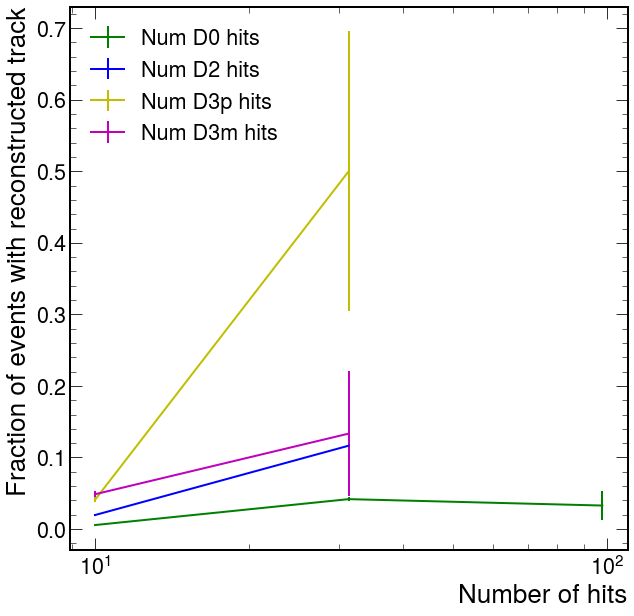

In [172]:
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsD0), np.array(nFakes), statistic='mean',bins=np.logspace(np.log10(10),np.log10(3000.0), 6))
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsD0), np.array(nFakes), statistic='std',bins=np.logspace(np.log10(10),np.log10(3000.0), 6))

bin_meansD2, bin_edgesD2, binnumberD2 = stats.binned_statistic(np.array(nhitsD2), np.array(nFakes), statistic='mean',bins=np.logspace(np.log10(10),np.log10(3000.0), 6))
bin_stdsD2, bin_edgesD2, binnumberD2 = stats.binned_statistic(np.array(nhitsD2), np.array(nFakes), statistic='std',bins=np.logspace(np.log10(10),np.log10(3000.0), 6))

bin_meansD3p, bin_edgesD3p, binnumberD3p = stats.binned_statistic(np.array(nhitsD3p), np.array(nFakes), statistic='mean',bins=np.logspace(np.log10(10),np.log10(3000.0), 6))
bin_stdsD3p, bin_edgesD3p, binnumberD3p = stats.binned_statistic(np.array(nhitsD3p), np.array(nFakes), statistic='std',bins=np.logspace(np.log10(10),np.log10(3000.0), 6))

bin_meansD3m, bin_edgesD3m, binnumberD3m = stats.binned_statistic(np.array(nhitsD3m), np.array(nFakes), statistic='mean',bins=np.logspace(np.log10(10),np.log10(3000.0), 6))
bin_stdsD3m, bin_edgesD3m, binnumberD3m = stats.binned_statistic(np.array(nhitsD3m), np.array(nFakes), statistic='std',bins=np.logspace(np.log10(10),np.log10(3000.0), 6))

counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,6,1)]
countsD2=[np.count_nonzero(binnumberD2==i) for i in np.arange(1,6,1)]
countsD3p=[np.count_nonzero(binnumberD3p==i) for i in np.arange(1,6,1)]
countsD3m=[np.count_nonzero(binnumberD3m==i) for i in np.arange(1,6,1)]

plt.errorbar(bin_edges[:5], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='Num D0 hits')
plt.errorbar(bin_edgesD2[:5], bin_meansD2, bin_stdsD2/np.sqrt(countsD2), color='b', lw=2, label='Num D2 hits')
plt.errorbar(bin_edgesD3p[:5], bin_meansD3p, bin_stdsD3p/np.sqrt(countsD3p), color='y', lw=2, label='Num D3p hits')
plt.errorbar(bin_edgesD3m[:5], bin_meansD3m, bin_stdsD3m/np.sqrt(countsD3m), color='m', lw=2, label='Num D3m hits')

plt.xlabel('Number of hits')
plt.ylabel('Fraction of events with reconstructed track')

plt.xscale("log")

plt.legend(loc='upper left')

In [90]:
pxsP_red = []
pysP_red = []
pzsP_red = []
ntracksP_red = []
for px in range(0, len(pxsP)):
    if(abs(pxsP[px]) > 0.0001):
        pxsP_red.append(pxsP[px])
        pysP_red.append(pysP[px])
        pzsP_red.append(pzsP[px])
        ntracksP_red.append(ntracksP[px])

Text(0, 1, 'Proportion of events')

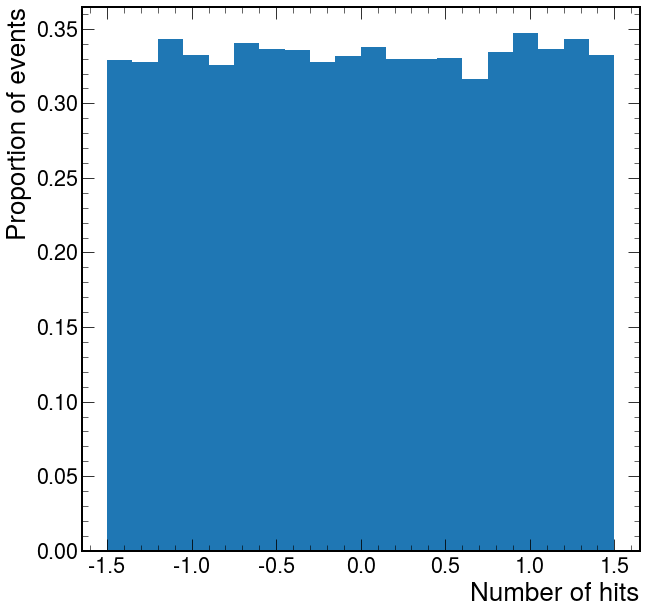

In [173]:
plt.hist(pxsP, density=True, bins=20)
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel('Number of hits')
plt.ylabel('Proportion of events')

Text(0, 1, 'Fraction of events with reconstructed track')

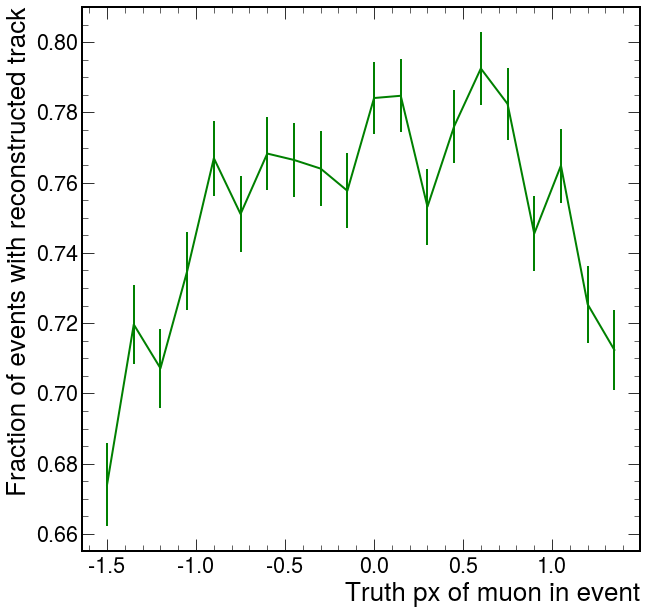

In [124]:
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(pxsP), np.array(ntracksP), statistic='mean',bins=20)
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(pxsP), np.array(ntracksP), statistic='std',bins=20)
counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='binned statistic of data')
plt.xlabel('Truth px of muon in event')
plt.ylabel('Fraction of events with reconstructed track')

Text(0, 1, 'Fraction of events with reconstructed track')

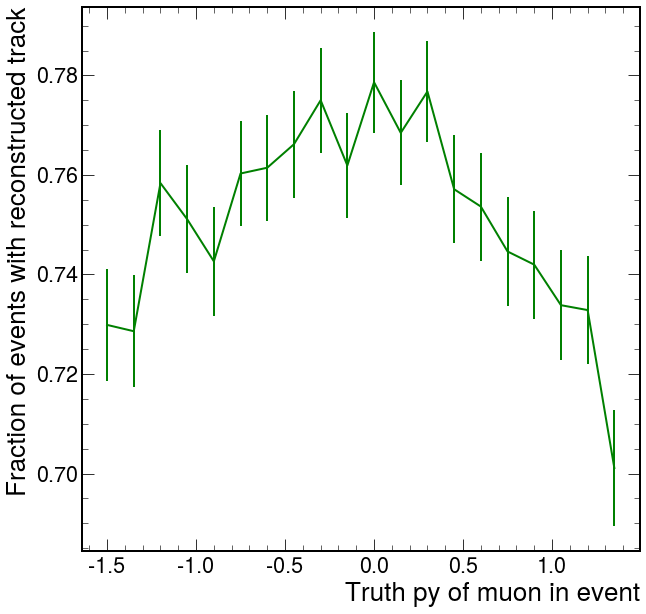

In [125]:
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(pysP), np.array(ntracksP), statistic='mean',bins=20)
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(pysP), np.array(ntracksP), statistic='std',bins=20)
counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='binned statistic of data')
plt.xlabel('Truth py of muon in event')
plt.ylabel('Fraction of events with reconstructed track')

Text(0, 1, 'Fraction of events with reconstructed track')

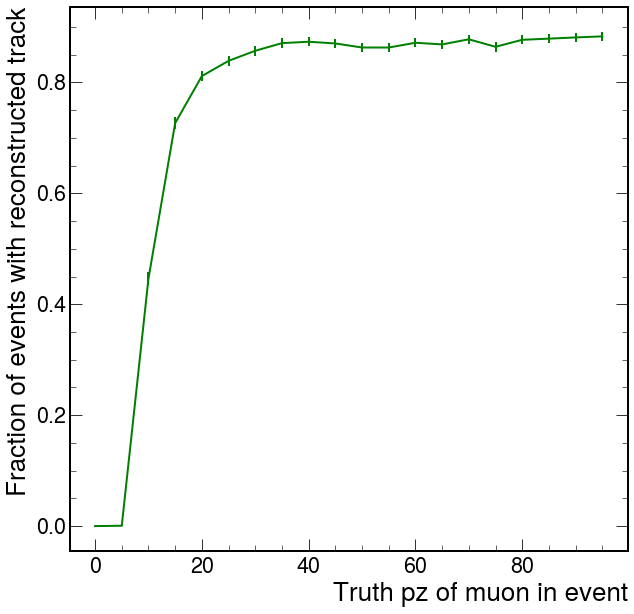

In [126]:
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(pzsP), np.array(ntracksP), statistic='mean',bins=20)
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(pzsP), np.array(ntracksP), statistic='std',bins=20)
counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='binned statistic of data')
plt.xlabel('Truth pz of muon in event')
plt.ylabel('Fraction of events with reconstructed track')

In [127]:
output = []
for i in range(len(pxsP)):
    if(abs(pxsP[i])<.5 and ((pysP[i]<1. and pysP[i]>0.5) or (pysP[i]<-.5 and pysP[i]>-1.))):
        output.append(i)

Text(0, 1, 'Fraction of events with reconstructed track')

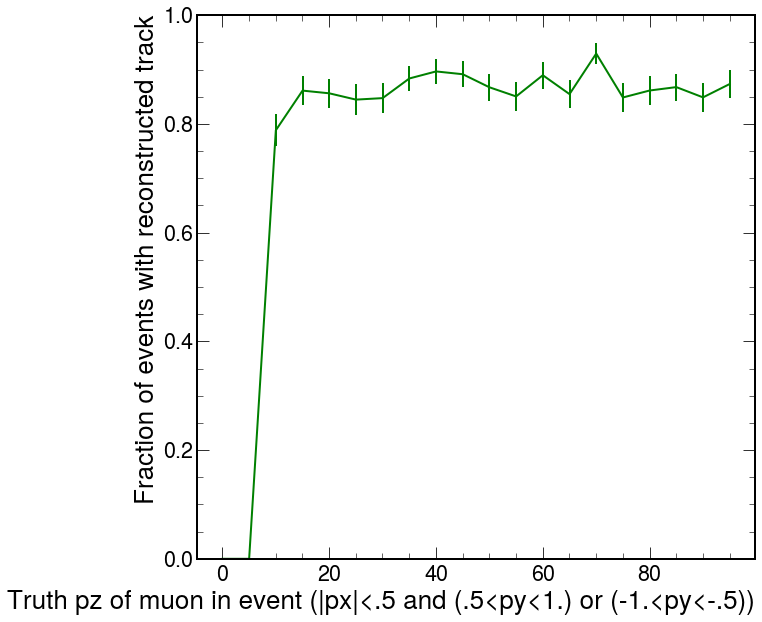

In [128]:
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(pzsP)[output], np.array(ntracksP)[output], statistic='mean',bins=20)
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(pzsP)[output], np.array(ntracksP)[output], statistic='std',bins=20)
counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='binned statistic of data')
plt.ylim([0., 1.])
plt.xlabel('Truth pz of muon in event (|px|<.5 and (.5<py<1.) or (-1.<py<-.5))')
plt.ylabel('Fraction of events with reconstructed track')

Text(0, 1, 'Truth pz of muon in event')

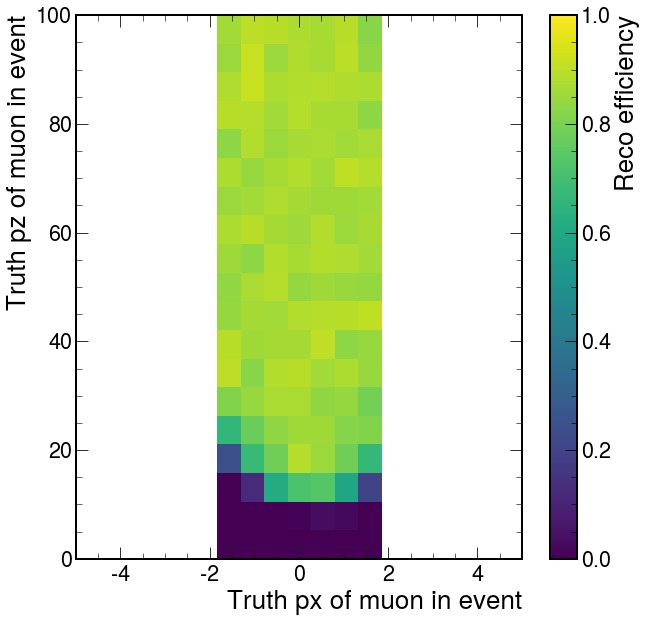

In [129]:
x_bins = np.linspace(-5, 5, 20)
y_bins = np.linspace(0, 100, 20)
bin_means = stats.binned_statistic_2d(np.array(pxsP), np.array(pzsP), np.array(ntracksP), statistic='mean',bins=[x_bins, y_bins])
#bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(pzs), np.array(ntracks), statistic='std',bins=20)
#counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
#plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='binned statistic of data')
im = plt.imshow(np.flip(bin_means.statistic.T,0), extent=(-5, 5, 0, 100), aspect='auto')
#cax = plt.axes([.95, .15, .075, .7])
#plt.colorbar(cax=cax)
plt.colorbar(im, label='Reco efficiency')
plt.clim(0.,1.)
plt.xlabel('Truth px of muon in event')
plt.ylabel('Truth pz of muon in event')

(array([ 4.,  4.,  7.,  4.,  6.,  3.,  4.,  5.,  3.,  3.,  5.,  2.,  2.,
         0.,  4.,  2.,  3.,  0.,  3.,  5., 13.,  5.,  8.,  7.,  6.,  7.,
        12.,  9.,  9.,  8.,  8.,  4.,  3.,  2.,  5.,  2.,  3.,  4.,  6.,
         6.,  8.,  7.,  6.,  9.,  9., 15., 17.,  7., 11.,  4.]),
 array([-119.19285583, -114.4989209 , -109.80498596, -105.11105103,
        -100.41711609,  -95.72318115,  -91.02924622,  -86.33531128,
         -81.64137634,  -76.94744141,  -72.25350647,  -67.55957153,
         -62.8656366 ,  -58.17170166,  -53.47776672,  -48.78383179,
         -44.08989685,  -39.39596191,  -34.70202698,  -30.00809204,
         -25.3141571 ,  -20.62022217,  -15.92628723,  -11.23235229,
          -6.53841736,   -1.84448242,    2.84945251,    7.54338745,
          12.23732239,   16.93125732,   21.62519226,   26.3191272 ,
          31.01306213,   35.70699707,   40.40093201,   45.09486694,
          49.78880188,   54.48273682,   59.17667175,   63.87060669,
          68.56454163,   73.25847656

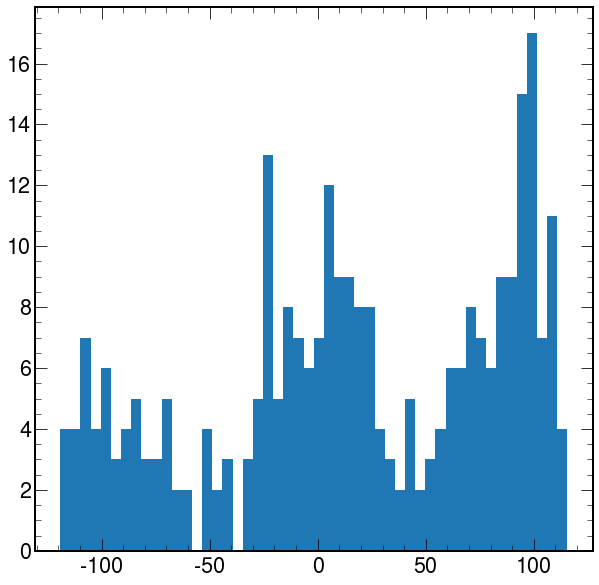

In [130]:
plt.hist(fakeXs, bins = 50)

(array([ 2.,  2.,  0.,  0.,  3.,  2.,  1.,  0.,  0.,  2.,  4.,  2.,  2.,
         1.,  3.,  0.,  3.,  3.,  7.,  8., 11.,  9., 12., 18., 12., 34.,
        29., 34., 19., 15., 14., 11.,  8.,  3.,  3.,  3.,  3.,  2.,  0.,
         1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-135.28077698, -130.22108368, -125.16139038, -120.10169708,
        -115.04200378, -109.98231049, -104.92261719,  -99.86292389,
         -94.80323059,  -89.74353729,  -84.68384399,  -79.6241507 ,
         -74.5644574 ,  -69.5047641 ,  -64.4450708 ,  -59.3853775 ,
         -54.3256842 ,  -49.26599091,  -44.20629761,  -39.14660431,
         -34.08691101,  -29.02721771,  -23.96752441,  -18.90783112,
         -13.84813782,   -8.78844452,   -3.72875122,    1.33094208,
           6.39063538,   11.45032867,   16.51002197,   21.56971527,
          26.62940857,   31.68910187,   36.74879517,   41.80848846,
          46.86818176,   51.92787506,   56.98756836,   62.04726166,
          67.10695496,   72.16664825

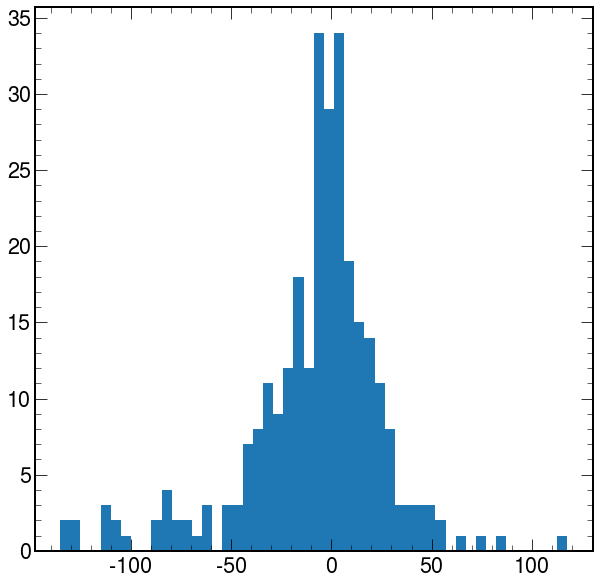

In [131]:
plt.hist(fakeYs, bins = 50)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
         1.,  0.,  0.,  1.,  3.,  1.,  7., 12., 18., 22., 35., 49., 24.,
        55., 24.,  7.,  6.,  4.,  4.,  0.,  5.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.]),
 array([-10.        ,  -9.59183673,  -9.18367347,  -8.7755102 ,
         -8.36734694,  -7.95918367,  -7.55102041,  -7.14285714,
         -6.73469388,  -6.32653061,  -5.91836735,  -5.51020408,
         -5.10204082,  -4.69387755,  -4.28571429,  -3.87755102,
         -3.46938776,  -3.06122449,  -2.65306122,  -2.24489796,
         -1.83673469,  -1.42857143,  -1.02040816,  -0.6122449 ,
         -0.20408163,   0.20408163,   0.6122449 ,   1.02040816,
          1.42857143,   1.83673469,   2.24489796,   2.65306122,
          3.06122449,   3.46938776,   3.87755102,   4.28571429,
          4.69387755,   5.10204082,   5.51020408,   5.91836735,
          6.32653061,   6.73469388,   7.14285714,   7.55102041,
          7.95918

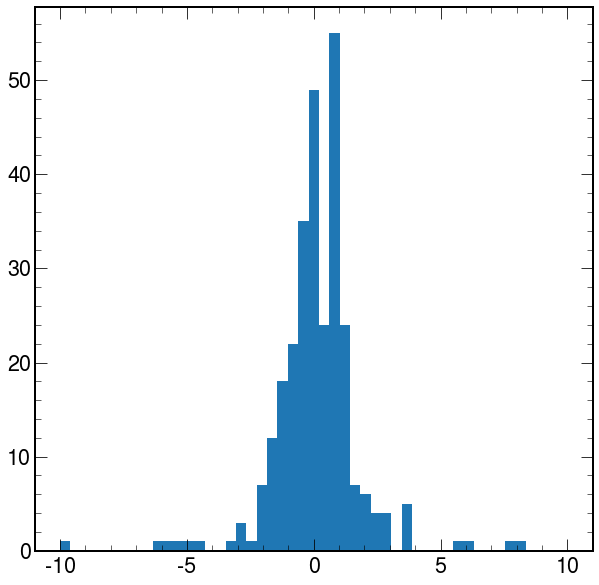

In [177]:
plt.hist(fakePXs, bins=np.linspace(-10, 10, 50))
#plt.yscale("log")

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   2.,   1.,   1.,   1.,   2.,   1.,   2.,   4.,   2.,  11.,
         14.,  41., 149.,  35.,   7.,   7.,   1.,   3.,   0.,   3.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]),
 array([-10.        ,  -9.59183673,  -9.18367347,  -8.7755102 ,
         -8.36734694,  -7.95918367,  -7.55102041,  -7.14285714,
         -6.73469388,  -6.32653061,  -5.91836735,  -5.51020408,
         -5.10204082,  -4.69387755,  -4.28571429,  -3.87755102,
         -3.46938776,  -3.06122449,  -2.65306122,  -2.24489796,
         -1.83673469,  -1.42857143,  -1.02040816,  -0.6122449 ,
         -0.20408163,   0.20408163,   0.6122449 ,   1.02040816,
          1.42857143,   1.83673469,   2.24489796,   2.65306122,
          3.06122449,   3.46938776,   3.87755102,   4.28571429,
          4.69387755,   5.10204082,   5.51020408,   5.91836735,
          6.32653061,   

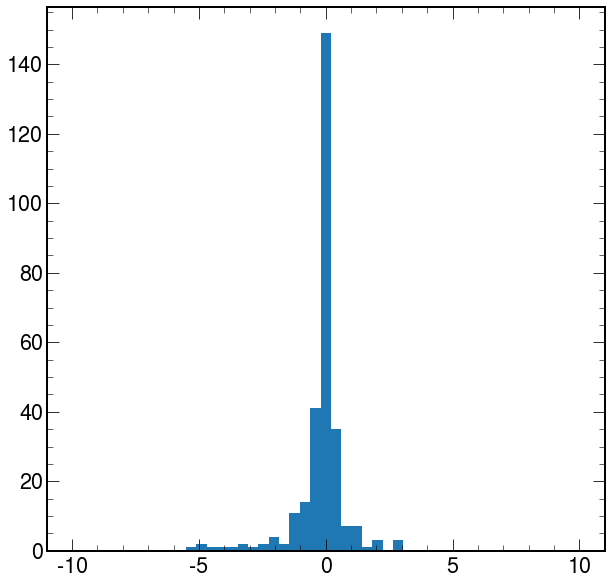

In [178]:
plt.hist(fakePYs, bins=np.linspace(-10, 10, 50))

(array([ 0.,  0.,  0.,  0.,  3., 42., 35., 21., 29., 24., 13., 13., 11.,
        10.,  8.,  4., 11.,  4.,  7.,  5.,  1.,  1.,  2.,  1.,  1.,  5.,
         3.,  3.,  0.,  2.,  4.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  2.,
         3.,  0.,  2.,  1.,  0.,  2.,  0.,  0.,  1.,  1.]),
 array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
          8.16326531,  10.20408163,  12.24489796,  14.28571429,
         16.32653061,  18.36734694,  20.40816327,  22.44897959,
         24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
         32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
         40.81632653,  42.85714286,  44.89795918,  46.93877551,
         48.97959184,  51.02040816,  53.06122449,  55.10204082,
         57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
         65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
         73.46938776,  75.51020408,  77.55102041,  79.59183673,
         81.63265306,  83.67346939,  85.71428571,  87.75510204,
         89.79591

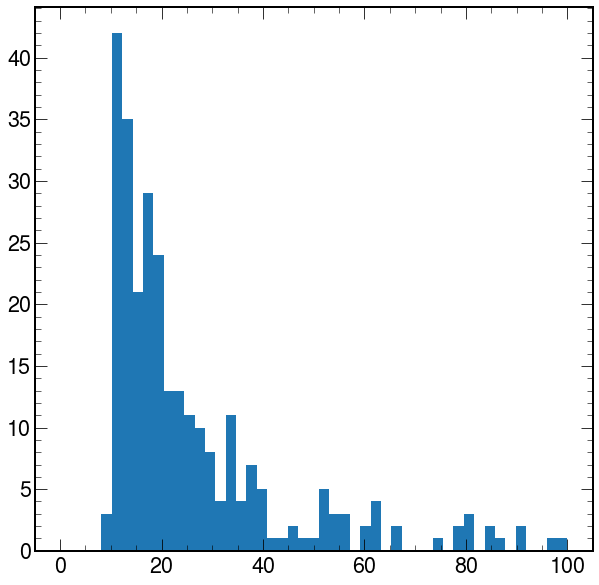

In [181]:
plt.hist(fakePZs, bins=np.linspace(0, 100, 50))
#plt.yscale("log")

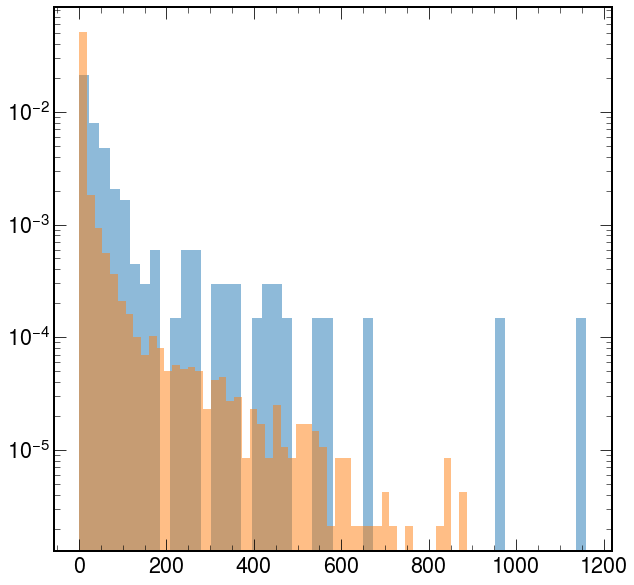

In [232]:
plt.hist(fakeChiSqs, bins = 50, density=True, alpha=0.5)
plt.hist(realChiSqs, bins = 50, density=True, alpha=0.5)
plt.yscale("log")

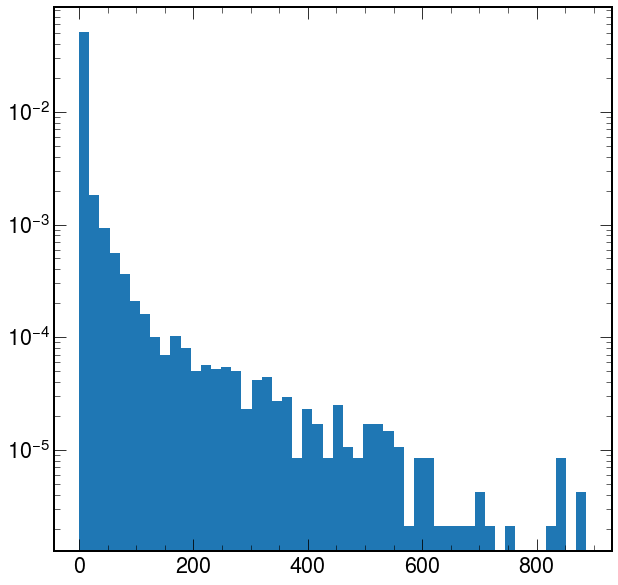

In [184]:
plt.hist(realChiSqs, bins = 50, density=True)
plt.yscale("log")

In [192]:
print(len(realChiSqs))
print(len(fakeChiSqs))
highchis = 0
for rcs in realChiSqs:
    if(rcs > 20):
        highchis += 1
highchisF = 0
for fcs in fakeChiSqs:
    if(fcs > 20):
        highchisF += 1
print(highchis)
print(highchisF)

26797
289
2262
155


In [217]:
#realPass = np.zeros(50)
#fakePass = np.zeros(50)
realPass = []
fakePass = []
bins = np.linspace(0,200,100)
for b in bins:
    realP = 0.
    fakeP = 0.
    for rcs in realChiSqs:
        if(rcs > b):
            realP += 1.
    for fcs in fakeChiSqs:
        if(fcs > b):
            fakeP += 1.
    realPass.append(realP/float(len(realChiSqs)))
    fakePass.append(fakeP/float(len(fakeChiSqs)))
realPass.append(0)
fakePass.append(0)

Text(0.1, 0.6, 'Fake track removal scheme\nbased on track $\\chi^2$ cut alone')

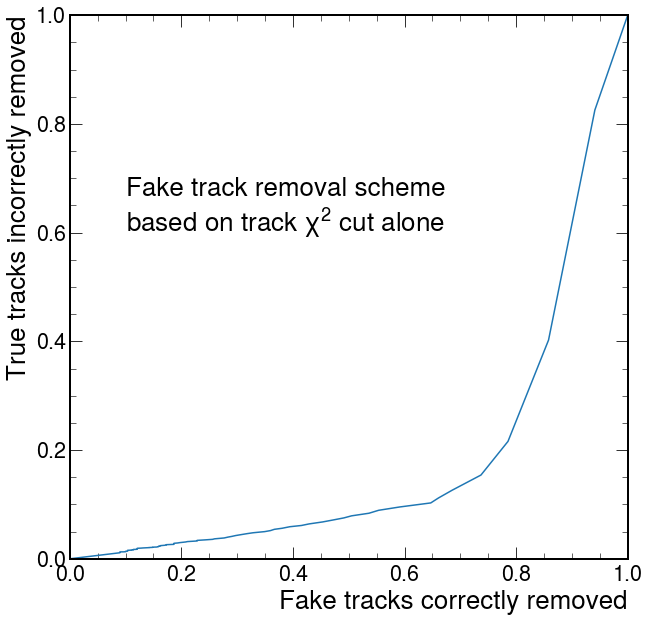

In [230]:
plt.errorbar(fakePass, realPass)
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel("Fake tracks correctly removed")
plt.ylabel("True tracks incorrectly removed")
plt.text(.1, .6, 'Fake track removal scheme\nbased on track $\chi^2$ cut alone')

In [16]:
#ifileGEN = "embedded_sample/generated_Jan20_32000ev.root"
#ifileGEN = "embedded_sample/generated_Jan24_32000ev.root"
#ifileGEN = "embedded_sample/generated_Jan25_32000ev.root"
#ifileGEN = "embedded_sample/generated_Jan31_EFF_32000ev.root"
#ifileGEN = "embedded_sample/generated_Feb1_EffAndRes_32000ev.root"
ifileGEN = "embedded_sample/generated_Feb2_wacky_32000ev.root"

In [17]:
kn_eventsGEN = getData(ifileGEN,"Events")

In [18]:
pxsGEN = []
pysGEN = []
pzsGEN = []
truthtrackXGEN = []
truthtrackXst1GEN = []
ntracksGEN = []
px_for_CALGEN = []
TTX_for_CALGEN = []
x_for_CALGEN = []
for i in range(0,30000):
    pxsGEN.append(kn_eventsGEN[i]["Electrons"].gpx[0])
    pysGEN.append(kn_eventsGEN[i]["Electrons"].gpy[0])
    pzsGEN.append(kn_eventsGEN[i]["Electrons"].gpz[0])
    if(kn_eventsGEN[i]["Tracks"].n_tracks[0] > 0):
        ntracksGEN.append(1)
    else:
        ntracksGEN.append(0)
    truthtrackXGEN.append(kn_eventsGEN[i]["Tracks"].truthtrack_x_st3[0])
    truthtrackXst1GEN.append(kn_eventsGEN[i]["Tracks"].truthtrack_x_st1[0])
    if(kn_eventsGEN[i]["Tracks"].n_tracks[0] == 1):
        px_for_CALGEN.append(kn_eventsGEN[i]["Electrons"].gpx[0])
        TTX_for_CALGEN.append(kn_eventsGEN[i]["Tracks"].truthtrack_x_st3[0])
        x_for_CALGEN.append(kn_eventsGEN[i]["RecoTracks"].track_x_CAL[0])

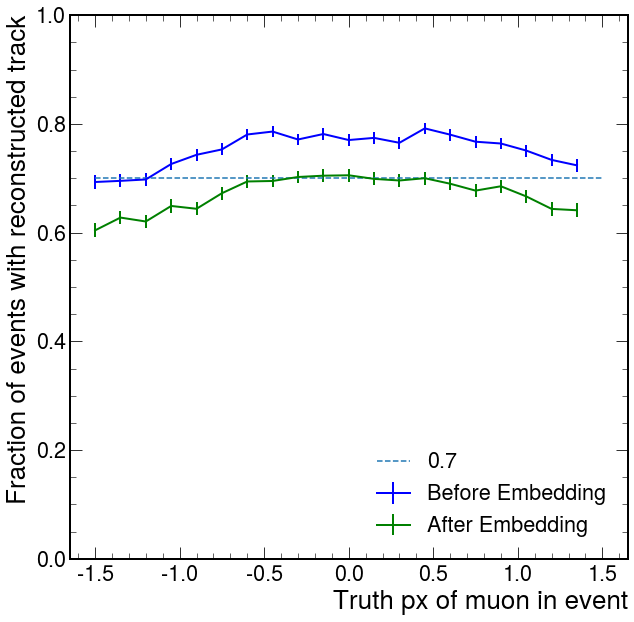

In [42]:
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(pxs), np.array(ntracks), statistic='mean',bins=20)
bin_meansGEN, bin_edgesGEN, binnumberGEN = stats.binned_statistic(np.array(pxsGEN), np.array(ntracksGEN), statistic='mean',bins=20)
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(pxs), np.array(ntracks), statistic='std',bins=20)
bin_stdsGEN, bin_edgesGEN, binnumberGEN = stats.binned_statistic(np.array(pxsGEN), np.array(ntracksGEN), statistic='std',bins=20)
counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
countsGEN=[np.count_nonzero(binnumberGEN==i) for i in np.arange(1,21,1)]
plt.errorbar(bin_edgesGEN[:20], bin_meansGEN, bin_stdsGEN/np.sqrt(countsGEN), color='b', lw=2, label='Before Embedding')
plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='After Embedding')
plt.ylim([0., 1.])
x1, y1 = [-1.5, 1.5], [.7, .7]
plt.plot(x1, y1, '--', label='0.7')
plt.xlabel('Truth px of muon in event')
plt.ylabel('Fraction of events with reconstructed track')
plt.legend(loc='lower right')

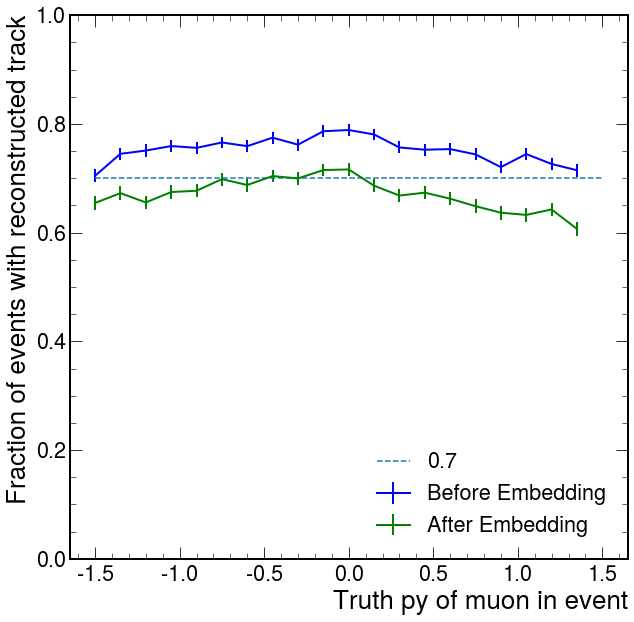

In [44]:
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(pys), np.array(ntracks), statistic='mean',bins=20)
bin_meansGEN, bin_edgesGEN, binnumberGEN = stats.binned_statistic(np.array(pysGEN), np.array(ntracksGEN), statistic='mean',bins=20)
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(pys), np.array(ntracks), statistic='std',bins=20)
bin_stdsGEN, bin_edgesGEN, binnumberGEN = stats.binned_statistic(np.array(pysGEN), np.array(ntracksGEN), statistic='std',bins=20)
counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
countsGEN=[np.count_nonzero(binnumberGEN==i) for i in np.arange(1,21,1)]
plt.errorbar(bin_edgesGEN[:20], bin_meansGEN, bin_stdsGEN/np.sqrt(countsGEN), color='b', lw=2, label='Before Embedding')
plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='After Embedding')
plt.ylim([0., 1.])
x1, y1 = [-1.5, 1.5], [.7, .7]
plt.plot(x1, y1, '--', label='0.7')
plt.xlabel('Truth py of muon in event')
plt.ylabel('Fraction of events with reconstructed track')
plt.legend(loc='lower right')

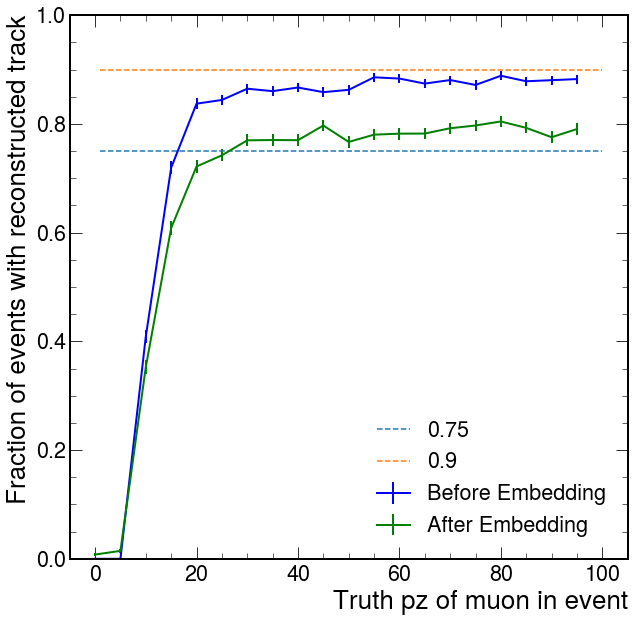

In [37]:
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(pzs), np.array(ntracks), statistic='mean',bins=20)
bin_meansGEN, bin_edgesGEN, binnumberGEN = stats.binned_statistic(np.array(pzsGEN), np.array(ntracksGEN), statistic='mean',bins=20)
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(pzs), np.array(ntracks), statistic='std',bins=20)
bin_stdsGEN, bin_edgesGEN, binnumberGEN = stats.binned_statistic(np.array(pzsGEN), np.array(ntracksGEN), statistic='std',bins=20)
counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
countsGEN=[np.count_nonzero(binnumberGEN==i) for i in np.arange(1,21,1)]
plt.errorbar(bin_edgesGEN[:20], bin_meansGEN, bin_stdsGEN/np.sqrt(countsGEN), color='b', lw=2, label='Before Embedding')
plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='After Embedding')
plt.ylim([0., 1.])
x1, y1 = [1, 100], [.75, .75]
plt.plot(x1, y1, '--', label='0.75')
y2 = [.9, .9]
plt.plot(x1, y2, '--', label='0.9')
plt.xlabel('Truth pz of muon in event')
plt.ylabel('Fraction of events with reconstructed track')
plt.legend(loc='lower right')

In [48]:
outputGEN = []
for i in range(len(pxsGEN)):
    if(abs(pxsGEN[i])<.5 and ((pysGEN[i]<1. and pysGEN[i]>0.5) or (pysGEN[i]<-.5 and pysGEN[i]>-1.))):
    #if(abs(pxsGEN[i])<.5 and abs(pysGEN[i])<.5):
        outputGEN.append(i)

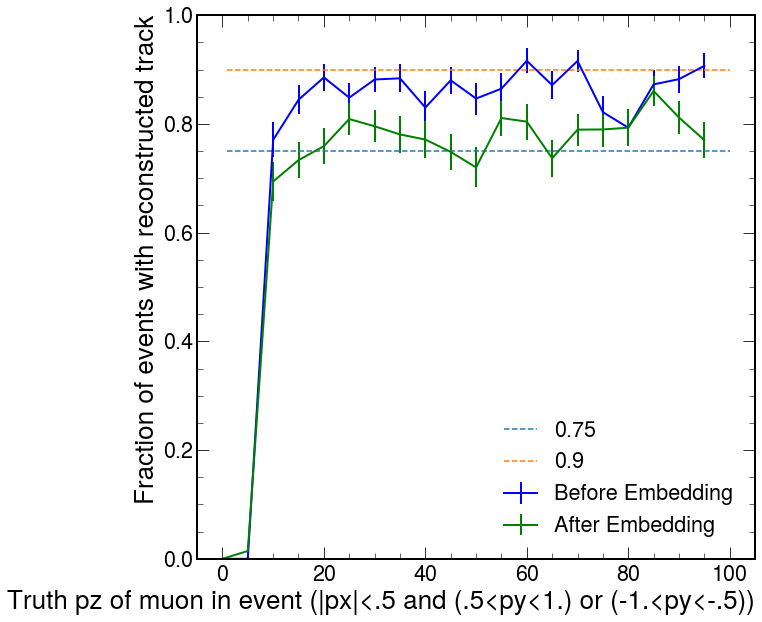

In [49]:
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(pzs)[output], np.array(ntracks)[output], statistic='mean',bins=20)
bin_meansGEN, bin_edgesGEN, binnumberGEN = stats.binned_statistic(np.array(pzsGEN)[outputGEN], np.array(ntracksGEN)[outputGEN], statistic='mean',bins=20)
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(pzs)[output], np.array(ntracks)[output], statistic='std',bins=20)
bin_stdsGEN, bin_edgesGEN, binnumberGEN = stats.binned_statistic(np.array(pzsGEN)[outputGEN], np.array(ntracksGEN)[outputGEN], statistic='std',bins=20)
counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
countsGEN=[np.count_nonzero(binnumberGEN==i) for i in np.arange(1,21,1)]
plt.errorbar(bin_edgesGEN[:20], bin_meansGEN, bin_stdsGEN/np.sqrt(countsGEN), color='b', lw=2, label='Before Embedding')
plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='After Embedding')
plt.ylim([0., 1.])
x1, y1 = [1, 100], [.75, .75]
plt.plot(x1, y1, '--', label='0.75')
y2 = [.9, .9]
plt.plot(x1, y2, '--', label='0.9')
plt.xlabel('Truth pz of muon in event (|px|<.5 and (.5<py<1.) or (-1.<py<-.5))')
plt.ylabel('Fraction of events with reconstructed track')
plt.legend(loc='lower right')

In [24]:
nhitsD0 = []
nhitsD1 = []
nhitsD2 = []
nhitsD3p = []
nhitsD3m = []
failCuts = []
failCutsNoD1 = []
failCutsHighD0 = []

for i in range(0,30000):
    #print(kn_events[i]["Hits"].n_hits_d0)
    if( kn_events[i]["Hits"].n_hits_d0 > 300 or kn_events[i]["Hits"].n_hits_d1 > 300 or kn_events[i]["Hits"].n_hits_d2 > 300 or kn_events[i]["Hits"].n_hits_d3p > 300 or kn_events[i]["Hits"].n_hits_d3m > 300):
        failCuts.append(1)
    else:
        failCuts.append(0)
    if( kn_events[i]["Hits"].n_hits_d0 > 300 or kn_events[i]["Hits"].n_hits_d2 > 300 or kn_events[i]["Hits"].n_hits_d3p > 300 or kn_events[i]["Hits"].n_hits_d3m > 300):
        failCutsNoD1.append(1)
    else:
        failCutsNoD1.append(0)
    if( kn_events[i]["Hits"].n_hits_d0 > 500 or kn_events[i]["Hits"].n_hits_d2 > 300 or kn_events[i]["Hits"].n_hits_d3p > 300 or kn_events[i]["Hits"].n_hits_d3m > 300):
        failCutsHighD0.append(1)
    else:
        failCutsHighD0.append(0)

    nhitsD0.append(kn_events[i]["Hits"].n_hits_d0)
    nhitsD1.append(kn_events[i]["Hits"].n_hits_d1)
    nhitsD2.append(kn_events[i]["Hits"].n_hits_d2)
    nhitsD3p.append(kn_events[i]["Hits"].n_hits_d3p)
    nhitsD3m.append(kn_events[i]["Hits"].n_hits_d3m)
"""
pys = []
pzs = []
truthtrackX = []
truthtrackXst1 = []
ntracks = []
px_for_CAL = []
TTX_for_CAL = []
x_for_CAL = []
for i in range(0,30000):
    pxs.append(kn_events[i]["Electrons"].gpx[0])
    pys.append(kn_events[i]["Electrons"].gpy[0])
    pzs.append(kn_events[i]["Electrons"].gpz[0])
    if(kn_events[i]["Tracks"].n_tracks[0] > 0):
        ntracks.append(1)
    else:
        ntracks.append(0)
    truthtrackX.append(kn_events[i]["Tracks"].truthtrack_x_st3[0])
    truthtrackXst1.append(kn_events[i]["Tracks"].truthtrack_x_st1[0])
    if(kn_events[i]["Tracks"].n_tracks[0] == 1):
        px_for_CAL.append(kn_events[i]["Electrons"].gpx[0])
        TTX_for_CAL.append(kn_events[i]["Tracks"].truthtrack_x_st3[0])
        x_for_CAL.append(kn_events[i]["RecoTracks"].track_x_CAL[0])
"""

'\npys = []\npzs = []\ntruthtrackX = []\ntruthtrackXst1 = []\nntracks = []\npx_for_CAL = []\nTTX_for_CAL = []\nx_for_CAL = []\nfor i in range(0,30000):\n    pxs.append(kn_events[i]["Electrons"].gpx[0])\n    pys.append(kn_events[i]["Electrons"].gpy[0])\n    pzs.append(kn_events[i]["Electrons"].gpz[0])\n    if(kn_events[i]["Tracks"].n_tracks[0] > 0):\n        ntracks.append(1)\n    else:\n        ntracks.append(0)\n    truthtrackX.append(kn_events[i]["Tracks"].truthtrack_x_st3[0])\n    truthtrackXst1.append(kn_events[i]["Tracks"].truthtrack_x_st1[0])\n    if(kn_events[i]["Tracks"].n_tracks[0] == 1):\n        px_for_CAL.append(kn_events[i]["Electrons"].gpx[0])\n        TTX_for_CAL.append(kn_events[i]["Tracks"].truthtrack_x_st3[0])\n        x_for_CAL.append(kn_events[i]["RecoTracks"].track_x_CAL[0])\n'

Text(0, 1, 'Fraction of Events (30,000 total in sample)')

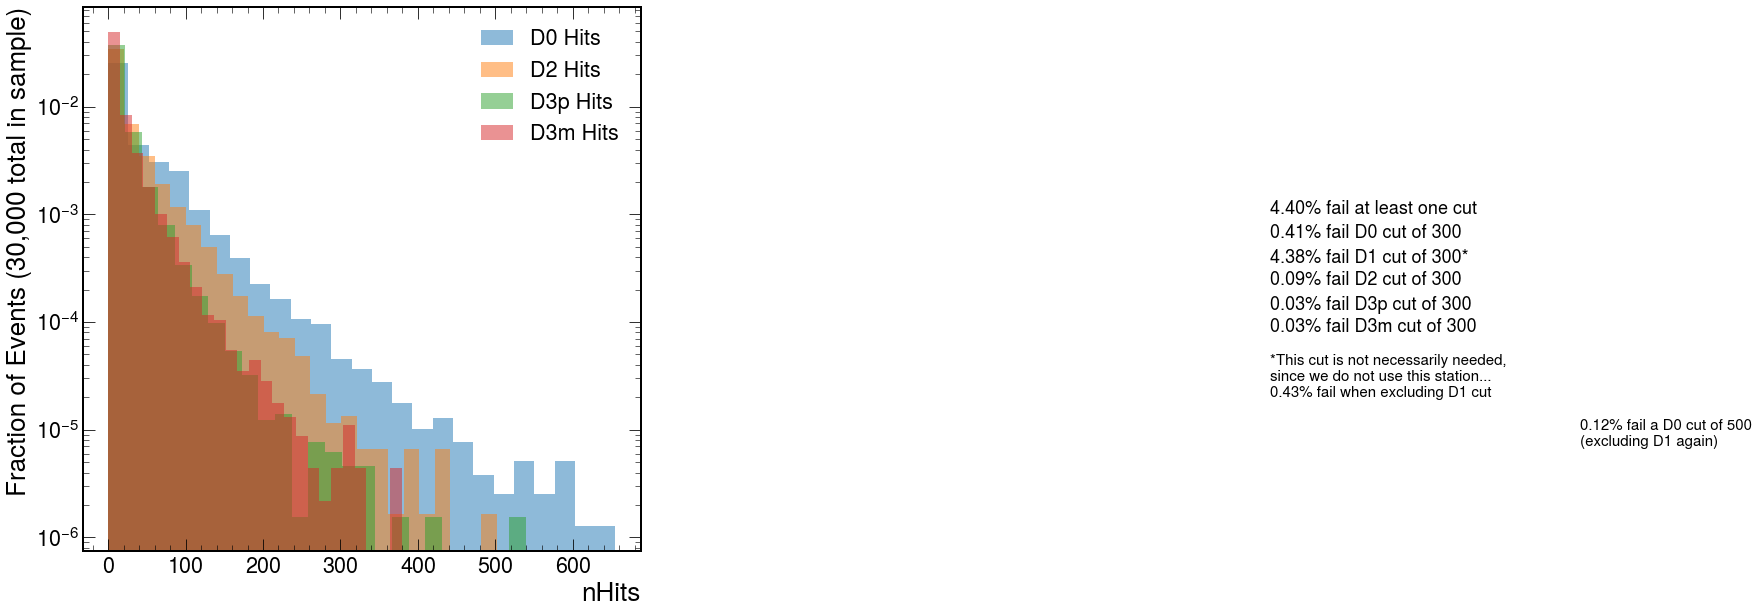

In [25]:
plt.hist(nhitsD0, bins = 25, alpha=0.5, label="D0 Hits", density = True)
plt.hist(nhitsD2, bins = 25, alpha=0.5, label="D2 Hits", density = True)
plt.hist(nhitsD3p, bins = 25, alpha=0.5, label="D3p Hits", density = True)
plt.hist(nhitsD3m, bins = 25, alpha=0.5, label="D3m Hits", density = True)
plt.yscale("log")
plt.legend(loc="upper right")
tooManyHitsD0 = np.array(nhitsD0) > 300
plt.text(1500, .001, '%.2f%% fail at least one cut'%(float(np.array(failCuts).sum())/300.), size='x-small')
plt.text(1500, .0006, '%.2f%% fail D0 cut of 300'%(float((np.array(nhitsD0) > 300).sum())/300.), size='x-small')
plt.text(1500, .00035, '%.2f%% fail D1 cut of 300*'%(float((np.array(nhitsD1) > 300).sum())/300.), size='x-small')
plt.text(1500, .00022, '%.2f%% fail D2 cut of 300'%(float((np.array(nhitsD2) > 300).sum())/300.), size='x-small')
plt.text(1500, .00013, '%.2f%% fail D3p cut of 300'%(float((np.array(nhitsD3p) > 300).sum())/300.), size='x-small')
plt.text(1500, .00008, '%.2f%% fail D3m cut of 300'%(float((np.array(nhitsD3m) > 300).sum())/300.), size='x-small')
plt.text(1500, .00002, '*This cut is not necessarily needed,\nsince we do not use this station...\n%.2f%% fail when excluding D1 cut'%(float(np.array(failCutsNoD1).sum())/300.), size='xx-small')
plt.text(1900, .000007, '\n%.2f%% fail a D0 cut of 500\n(excluding D1 again)'%(float(np.array(failCutsHighD0).sum())/300.), size='xx-small')
#print(tooManyHitsD0.sum())
plt.xlabel("nHits")
plt.ylabel("Fraction of Events (30,000 total in sample)")

<ipython-input-26-057d43382eaf>:18: RuntimeWarning: invalid value encountered in true_divide
  plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='Num D0 hits')
<ipython-input-26-057d43382eaf>:19: RuntimeWarning: invalid value encountered in true_divide
  plt.errorbar(bin_edgesD2[:20], bin_meansD2, bin_stdsD2/np.sqrt(countsD2), color='b', lw=2, label='Num D2 hits')
<ipython-input-26-057d43382eaf>:20: RuntimeWarning: invalid value encountered in true_divide
  plt.errorbar(bin_edgesD3p[:20], bin_meansD3p, bin_stdsD3p/np.sqrt(countsD3p), color='y', lw=2, label='Num D3p hits')
<ipython-input-26-057d43382eaf>:21: RuntimeWarning: invalid value encountered in true_divide
  plt.errorbar(bin_edgesD3m[:20], bin_meansD3m, bin_stdsD3m/np.sqrt(countsD3m), color='m', lw=2, label='Num D3m hits')


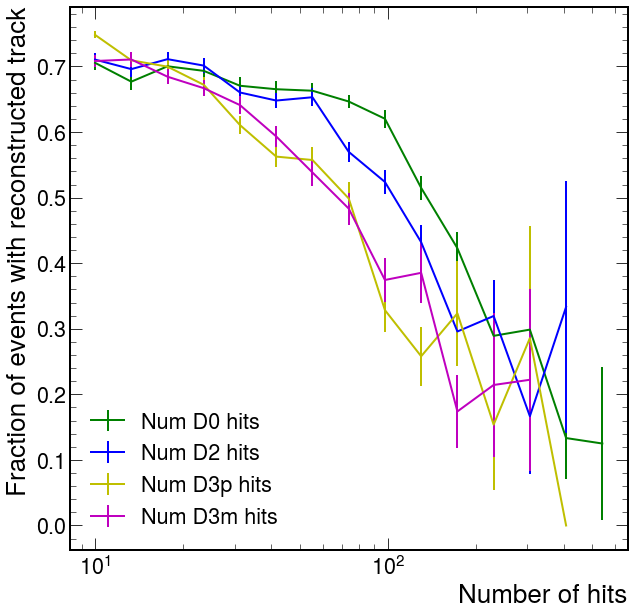

In [26]:
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsD0), np.array(ntracks), statistic='mean',bins=np.logspace(np.log10(10),np.log10(3000.0), 21))
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(nhitsD0), np.array(ntracks), statistic='std',bins=np.logspace(np.log10(10),np.log10(3000.0), 21))

bin_meansD2, bin_edgesD2, binnumberD2 = stats.binned_statistic(np.array(nhitsD2), np.array(ntracks), statistic='mean',bins=np.logspace(np.log10(10),np.log10(3000.0), 21))
bin_stdsD2, bin_edgesD2, binnumberD2 = stats.binned_statistic(np.array(nhitsD2), np.array(ntracks), statistic='std',bins=np.logspace(np.log10(10),np.log10(3000.0), 21))

bin_meansD3p, bin_edgesD3p, binnumberD3p = stats.binned_statistic(np.array(nhitsD3p), np.array(ntracks), statistic='mean',bins=np.logspace(np.log10(10),np.log10(3000.0), 21))
bin_stdsD3p, bin_edgesD3p, binnumberD3p = stats.binned_statistic(np.array(nhitsD3p), np.array(ntracks), statistic='std',bins=np.logspace(np.log10(10),np.log10(3000.0), 21))

bin_meansD3m, bin_edgesD3m, binnumberD3m = stats.binned_statistic(np.array(nhitsD3m), np.array(ntracks), statistic='mean',bins=np.logspace(np.log10(10),np.log10(3000.0), 21))
bin_stdsD3m, bin_edgesD3m, binnumberD3m = stats.binned_statistic(np.array(nhitsD3m), np.array(ntracks), statistic='std',bins=np.logspace(np.log10(10),np.log10(3000.0), 21))

counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
countsD2=[np.count_nonzero(binnumberD2==i) for i in np.arange(1,21,1)]
countsD3p=[np.count_nonzero(binnumberD3p==i) for i in np.arange(1,21,1)]
countsD3m=[np.count_nonzero(binnumberD3m==i) for i in np.arange(1,21,1)]

plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='Num D0 hits')
plt.errorbar(bin_edgesD2[:20], bin_meansD2, bin_stdsD2/np.sqrt(countsD2), color='b', lw=2, label='Num D2 hits')
plt.errorbar(bin_edgesD3p[:20], bin_meansD3p, bin_stdsD3p/np.sqrt(countsD3p), color='y', lw=2, label='Num D3p hits')
plt.errorbar(bin_edgesD3m[:20], bin_meansD3m, bin_stdsD3m/np.sqrt(countsD3m), color='m', lw=2, label='Num D3m hits')

plt.xlabel('Number of hits')
plt.ylabel('Fraction of events with reconstructed track')

plt.xscale("log")

plt.legend(loc='lower left')

In [59]:
differences = []
truthtrack_pz_st1 = []
track_pz_st1 = []

for i in range(0,30000):
    #print(kn_events[i]["Hits"].n_hits_d0)
    if( kn_events[i]["Tracks"].n_tracks[0] > 0 ):
        differences.append(kn_events[i]["RecoTracks"].track_pz_st1[0] - kn_events[i]["Tracks"].truthtrack_pz_st1[0])
        truthtrack_pz_st1.append(kn_events[i]["Tracks"].truthtrack_pz_st1[0])
        track_pz_st1.append(kn_events[i]["RecoTracks"].track_pz_st1[0])

Text(0, 1, 'Reco pz in station 1')

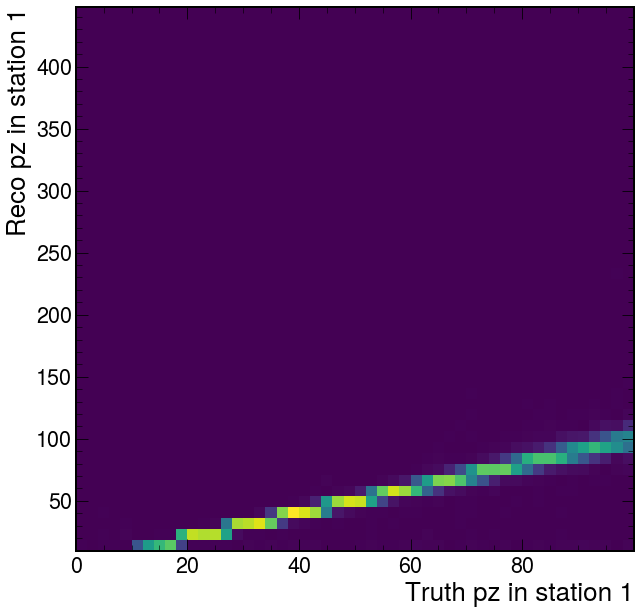

In [28]:
plt.hist2d(truthtrack_pz_st1, track_pz_st1, bins=50)
plt.xlabel("Truth pz in station 1")
plt.ylabel("Reco pz in station 1")

Text(0, 1, 'Fraction of events (with reco track)')

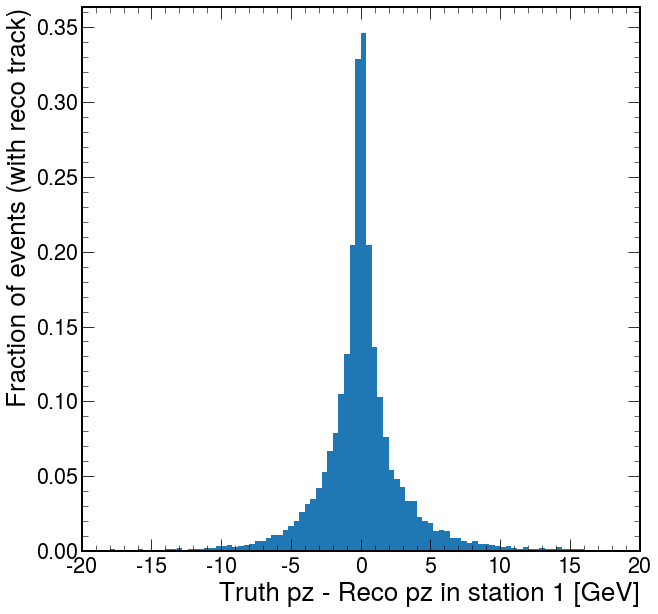

In [29]:
plt.hist(differences, bins=100, range=[-20, 20], density=True)
#plt.yscale("log")
plt.xlim([-20, 20])
plt.xlabel("Truth pz - Reco pz in station 1 [GeV]")
plt.ylabel("Fraction of events (with reco track)")

In [54]:
differencesGEN = []
truthtrack_pz_st1GEN = []
track_pz_st1GEN = []

for i in range(0,30000):
    #print(kn_events[i]["Hits"].n_hits_d0)
    if( kn_eventsGEN[i]["Tracks"].n_tracks[0] > 0 ):
        differencesGEN.append(kn_eventsGEN[i]["RecoTracks"].track_pz_st1[0] - kn_eventsGEN[i]["Tracks"].truthtrack_pz_st1[0])
        truthtrack_pz_st1GEN.append(kn_eventsGEN[i]["Tracks"].truthtrack_pz_st1[0])
        track_pz_st1GEN.append(kn_eventsGEN[i]["RecoTracks"].track_pz_st1[0])

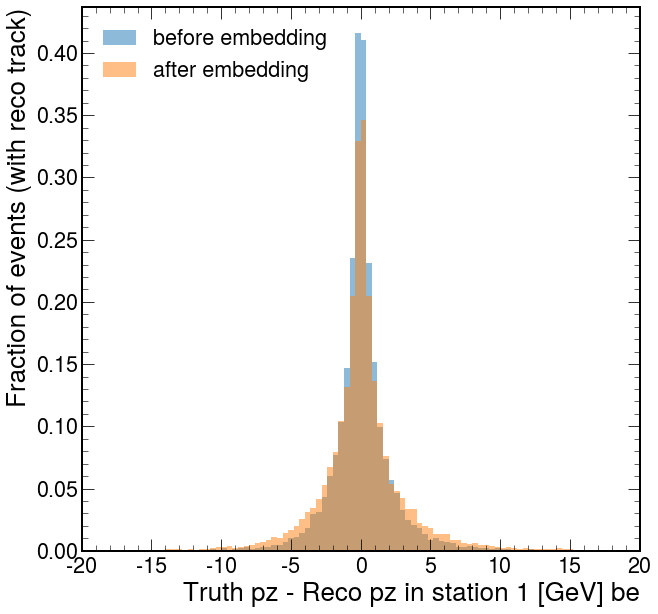

In [60]:
plt.hist(differencesGEN, bins=100, range=[-20, 20], density=True, label = 'before embedding', alpha=0.5)
plt.hist(differences, bins=100, range=[-20, 20], density=True, label = 'after embedding', alpha=0.5)
#plt.yscale("log")
plt.xlim([-20, 20])
plt.xlabel("Truth pz - Reco pz in station 1 [GeV] be")
plt.ylabel("Fraction of events (with reco track)")
plt.legend(loc='upper left')